###**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Loading necessary libraries**

In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import re
from collections import Counter
from scipy.stats import ttest_ind

###**Loading the Dataset as transactionData and customerData.**

In [ ]:
transactionData = pd.read_csv('/content/drive/MyDrive/GitHub/Quantium-Virtual-Internship---Retail-Strategy-and-Analytics-Task-1/Data /QVI_transaction_data.csv')
customerData = pd.read_csv('/content/drive/MyDrive/GitHub/Quantium-Virtual-Internship---Retail-Strategy-and-Analytics-Task-1/Data /QVI_purchase_behaviour.csv')
td = transactionData
cd = customerData
print('Transaction data\n',transactionData.head())
print('Customer data\n',customerData.head())

Transaction data
     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
Customer data
    LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES    

In [ ]:
td.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

### **As the dates were in Int format we convert it to date_time format of pandas**

In [ ]:
td['DATE'] = pd.to_datetime(td['DATE'],unit='D', origin='1899-12-30')

In [ ]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### **Checking to see if we are dealing with right products, i.e chips.**

In [ ]:
td['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

###**Now time to remove all the unwanted characters like &,/ etc.**

In [ ]:
# Use a regular expression to remove all special characters from the 'PROD_NAME' column
td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'[^a-zA-Z0-9\s]', '')

<ipython-input-8-7df840c1550f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'[^a-zA-Z0-9\s]', '')


###**Extracting the weights from the 'PROD_NAME' and storing them in a new column 'package_weight'**

In [ ]:
# Use a regular expression to extract the weight from the 'PROD_NAME' column
td['package_weight'] = td['PROD_NAME'].str.extract(r'(\d+[gG])')
td['package_weight']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: package_weight, Length: 264836, dtype: object

In [ ]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150g


**Checking to see if we have any null values in the new created column 'package_weight'**

In [ ]:
td[td['package_weight'].isnull()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight


###**Removing all the extracted weights from the 'PROD_NAME' & counting all word occurences to see what products we are dealing with**

In [ ]:
# Use a regular expression to remove the weight from the 'PROD_NAME' column
td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'(\d+[gG])', '')

# Split the values in the 'PROD_NAME' column into a list of words
words = td['PROD_NAME'].str.split()

# Flatten the list of words into a single list
all_words = [word for sublist in words for word in sublist]

# Use the Counter class to count the occurrences of each word
word_counts = Counter(all_words)

# Sort the values by frequency
sorted_word_counts = word_counts.most_common()

print(sorted_word_counts)

<ipython-input-12-8a25c4c76fe4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'(\d+[gG])', '')


[('Chips', 49770), ('Kettle', 41288), ('Smiths', 28860), ('Salt', 27976), ('Cheese', 27890), ('Pringles', 25102), ('Doritos', 24962), ('Crinkle', 23960), ('Corn', 22063), ('Original', 21560), ('Cut', 20754), ('Chip', 18645), ('Chicken', 18577), ('Salsa', 18094), ('Sea', 14145), ('Thins', 14075), ('Chilli', 13895), ('Sour', 13882), ('Crisps', 12607), ('Vinegar', 12402), ('RRD', 11894), ('Infuzions', 11057), ('Supreme', 10963), ('WW', 10320), ('Cobs', 9693), ('Popd', 9693), ('Tortilla', 9580), ('Tostitos', 9471), ('Twisties', 9454), ('Sensations', 9429), ('Old', 9324), ('El', 9324), ('Paso', 9324), ('Dip', 9324), ('Sweet', 7883), ('Lime', 7852), ('Chives', 7846), ('Tomato', 7669), ('Cream', 7618), ('Thinly', 7507), ('Tyrrells', 6442), ('And', 6373), ('BBQ', 6351), ('Tangy', 6332), ('Grain', 6272), ('Waves', 6272), ('Lightly', 6248), ('Salted', 6248), ('Soy', 6121), ('Natural', 6050), ('Mild', 6048), ('Red', 5885), ('Rock', 5885), ('Deli', 5885), ('Thai', 4737), ('Burger', 4733), ('Swt', 

In [ ]:
td.head() #checking to see if replacing worked. 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150g


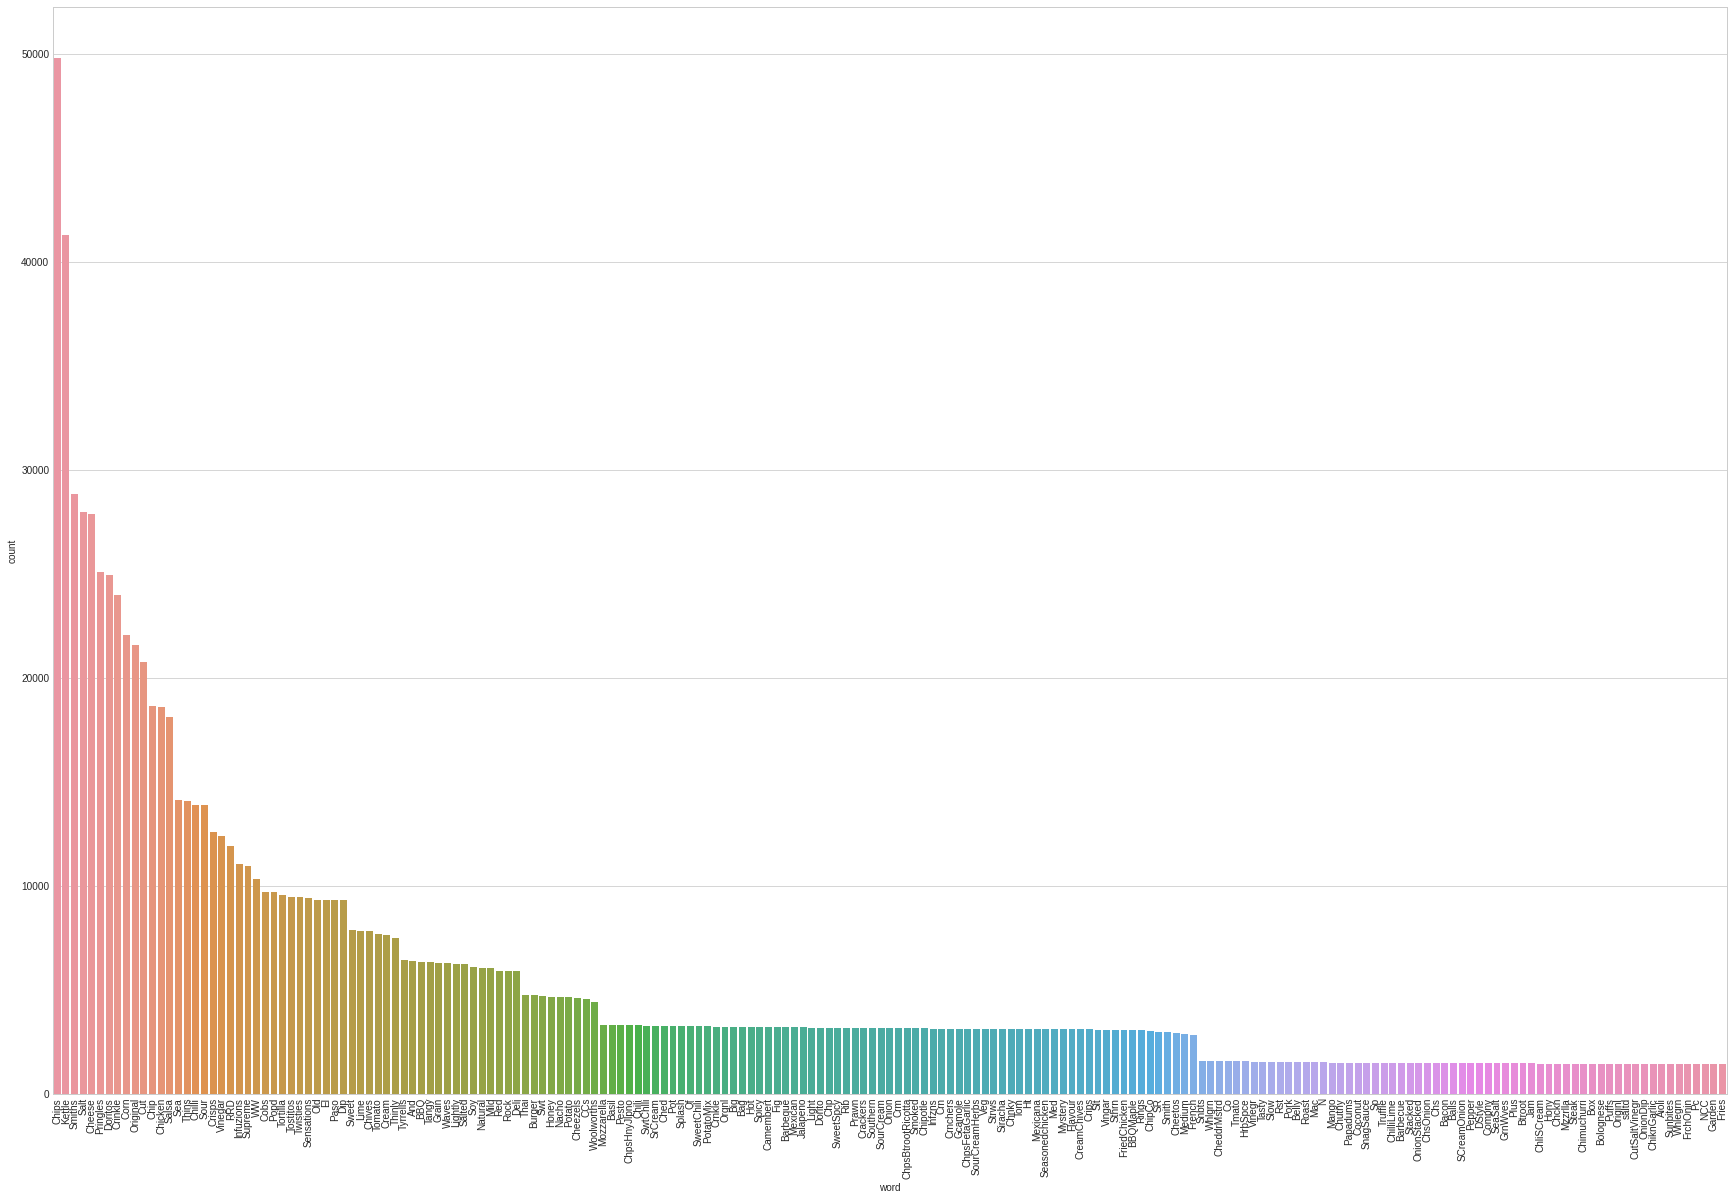

In [ ]:
# Extract the words and counts into separate lists
words = [word for word, count in sorted_word_counts]
counts = [count for word, count in sorted_word_counts]

# Create a DataFrame from the lists
df = pd.DataFrame({'word': words, 'count': counts})

# Set the plot size
plt.figure(figsize=(30, 20))

# Create a bar plot of the word counts using seaborn
sns.barplot(x='word', y='count', data=df)
# Rotate the x-axis labels
plt.xticks(rotation=90)
# Show the plot
plt.show()

(0.0, 10.0)

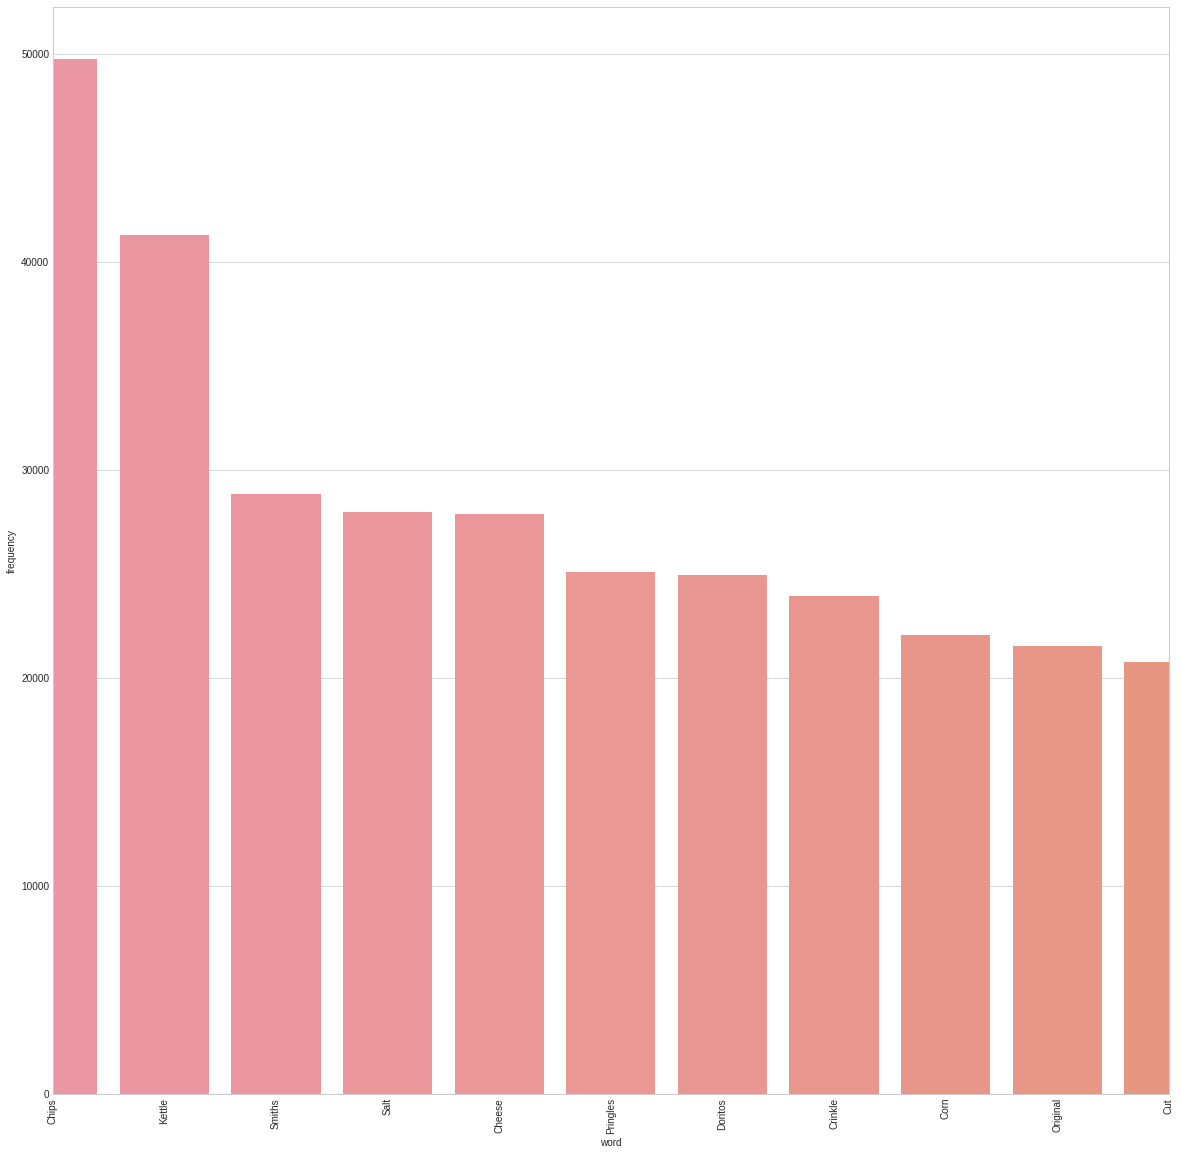

In [ ]:

# Create a dataframe with the word frequencies
tf = pd.DataFrame(sorted_word_counts, columns=['word', 'frequency'])

# Set the size of the plot
plt.figure(figsize=(20,20))

# Create a bar plot of the word frequencies using seaborn
sns.barplot(x='word', y='frequency', data=tf)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Zoom in on the x-axis
plt.xlim(left=0, right=10)

###**As we are only interested in the chips products so we are going to remove all 'Salsa' and 'dips' products.**

In [ ]:
td['PROD_NAME'].str.contains('Salsa').value_counts() #checking how many Salsa products are there

False    246742
True      18094
Name: PROD_NAME, dtype: int64

In [ ]:
salsa_rows = td[td['PROD_NAME'].str.contains('Salsa')]
salsa_rows

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300g
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300g
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa Mzzrlla,2,5.4,150g
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa,1,2.6,150g
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium,1,2.6,300g
...,...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med,1,5.1,300g
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa,1,1.5,300g
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa,1,2.6,150g
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild,1,2.6,300g


In [ ]:
dip = td[td['PROD_NAME'].str.contains('Dip' or 'dip')]
dip

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300g
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300g
39,2018-08-18,55,55072,48878,107,Smiths Crinkle Cut French OnionDip,1,2.6,150g
71,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht,1,5.1,300g
83,2019-05-15,111,111487,113669,107,Smiths Crinkle Cut French OnionDip,1,2.6,150g
...,...,...,...,...,...,...,...,...,...
264670,2018-10-01,265,265066,263358,107,Smiths Crinkle Cut French OnionDip,2,5.2,150g
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med,1,5.1,300g
264717,2018-10-25,266,266230,264056,107,Smiths Crinkle Cut French OnionDip,1,2.6,150g
264746,2018-10-18,268,268200,264616,107,Smiths Crinkle Cut French OnionDip,1,2.6,150g


###**Removing the products with dip in them as we only need chips.**
After further inspection I found that there are particular 3 products that are actually chips but has been miscategorized as 'dips' or 'Salsa'. So we will retain them and remove every other occurences.

In [ ]:
x = td[~((td['PROD_NAME'].str.contains("Salsa", case=False)) & 
        (~td['PROD_NAME'].isin(["Smiths Crinkle Cut Tomato Salsa", "Smiths Crinkle Cut French Onion Dip", "Red Rock Deli SR Salsa Mzzrlla"])) |
        (td['PROD_NAME'].str.contains("Dip|dip", case=False)))]

In [ ]:
x

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150g


In [ ]:
x.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
package_weight            object
dtype: object

###**Our weight feature is an object. We need to remove the 'g|G' from the weight column and convert it to int.**

In [ ]:
x['package_weight'] = x['package_weight'].str.replace('g|G', '')

<ipython-input-22-d2f8889332e9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x['package_weight'] = x['package_weight'].str.replace('g|G', '')
<ipython-input-22-d2f8889332e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['package_weight'] = x['package_weight'].str.replace('g|G', '')


In [ ]:
x

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


In [ ]:
x.isnull().sum(0)

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
package_weight    0
dtype: int64

In [ ]:
# Convert the 'package_weight' column to integers
x['package_weight'] = x['package_weight'].astype(int)

<ipython-input-25-1b3db74a917d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['package_weight'] = x['package_weight'].astype(int)


In [ ]:
x.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
package_weight             int64
dtype: object

###**We can see the package weight varies from 380g to 70g**

In [ ]:
x.sort_values(by='package_weight', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
125866,2019-06-06,119,119249,123091,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380
184109,2018-07-29,250,250249,252488,4,Dorito Corn Chp Supreme,2,13.0,380
184162,2019-02-26,253,253010,253548,4,Dorito Corn Chp Supreme,2,13.0,380
250232,2018-11-06,155,155191,156250,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380
57464,2018-11-11,40,40344,37701,4,Dorito Corn Chp Supreme,2,13.0,380
...,...,...,...,...,...,...,...,...,...
20656,2018-11-09,116,116166,120143,38,Infuzions Mango Chutny Papadums,2,4.8,70
38481,2019-01-11,71,71155,69938,38,Infuzions Mango Chutny Papadums,2,4.8,70
107445,2019-02-08,110,110060,112046,38,Infuzions Mango Chutny Papadums,2,4.8,70
87760,2018-12-18,98,98353,98136,38,Infuzions Mango Chutny Papadums,1,2.4,70


In [ ]:
x['package_weight'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70])

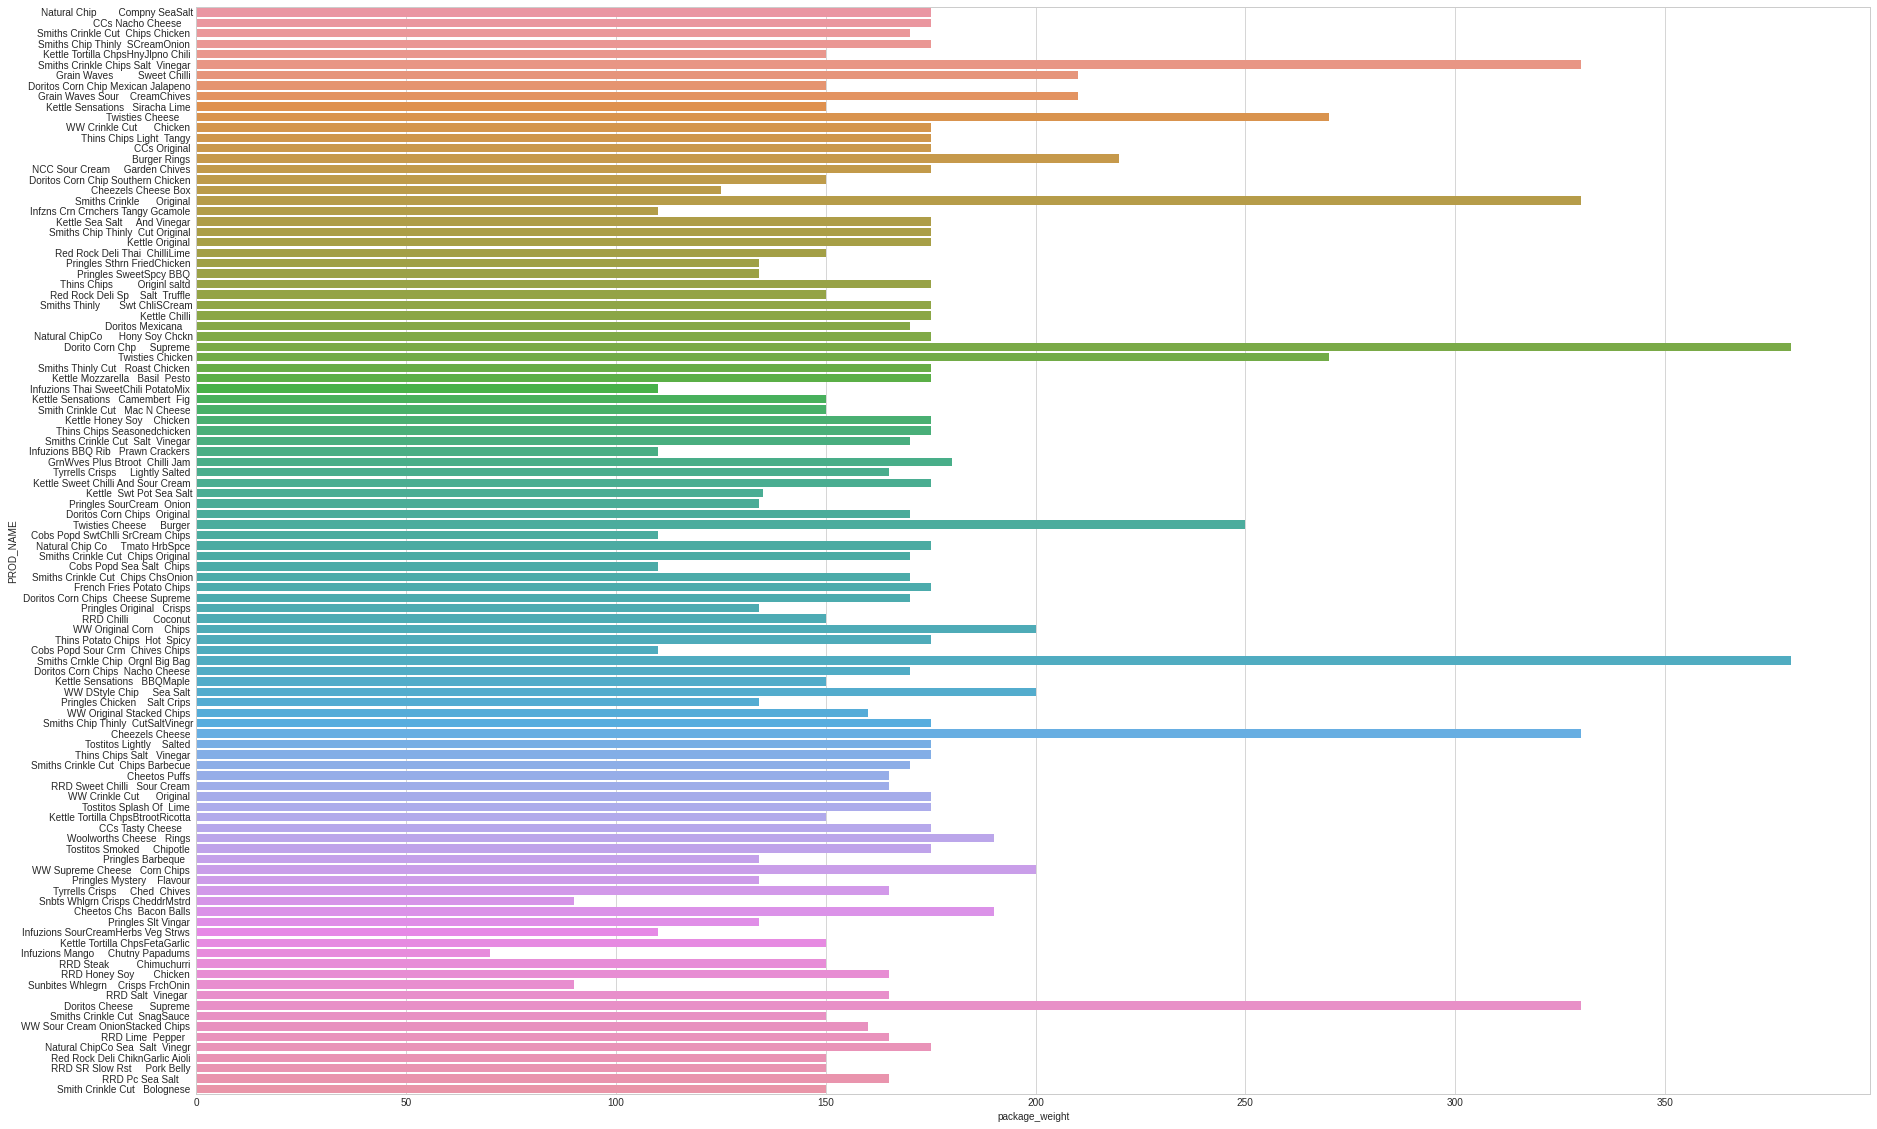

In [ ]:
plt.figure(figsize=(30, 20))
sns.barplot(x='package_weight', y='PROD_NAME', data=x)

In [ ]:
x.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,package_weight
count,245304.000000,2.453040e+05,2.453040e+05,245304.000000,245304.000000,245304.000000,245304.000000
mean,135.053322,1.355352e+05,1.351340e+05,56.054883,1.908200,7.335517,175.735161
std,76.796402,8.074658e+04,7.815838e+04,33.569505,0.661172,3.080377,59.576294
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001400e+04,6.755875e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303675e+05,1.351865e+05,52.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030862e+05,2.026662e+05,86.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


**We can see PROD_QTY and TOT_SALES have an outlier which we will investigate further with boxplots.**

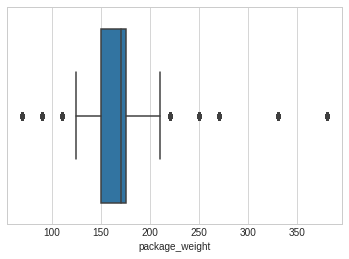

In [ ]:
sns.boxplot(x='package_weight', data=x)

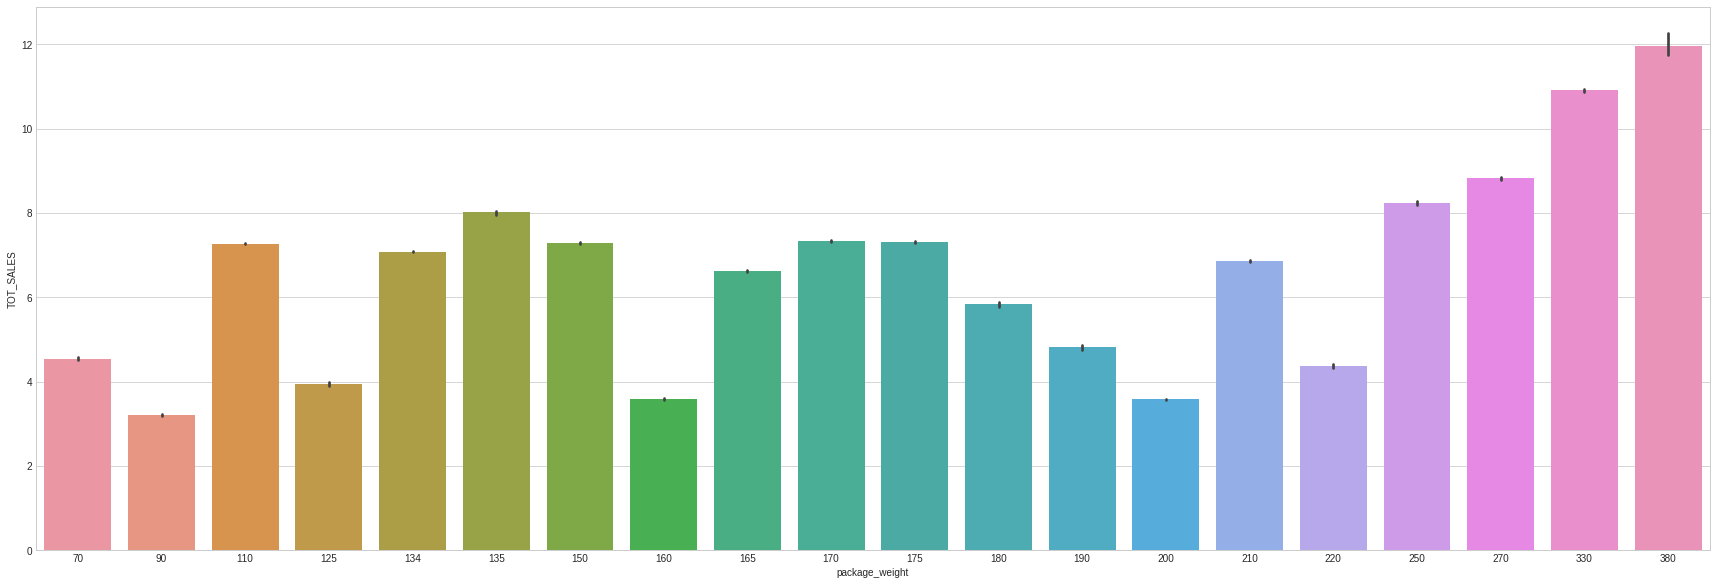

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x='package_weight',y = 'TOT_SALES', data=x,)

 **We can Clearly see bigger packaged chips have higher sale rate.**

###**Detecting Outliers**

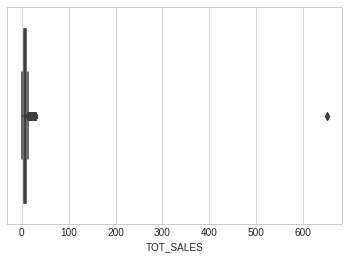

In [ ]:
boxplot_obj = sns.boxplot(x='TOT_SALES', data=x)

In [ ]:
# Calculate the 1st and 99th percentiles
p1 = x['TOT_SALES'].quantile(0.01)
p99 = x['TOT_SALES'].quantile(0.99)

# Filter the dataframe to get the extreme outliers
outliers_sales = x[(x['TOT_SALES'] < p1) | (x['TOT_SALES'] > p99)]

In [ ]:
outliers_sales.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime,5,23.0,150
13,2018-08-17,13,13213,12447,92,WW Crinkle Cut Chicken,1,1.7,175
31,2019-05-15,43,43227,40186,26,Pringles SweetSpcy BBQ,4,14.8,134


**As the Outlier is extreme case and we can't use neither IQR nor quantile 0.99 method. I read the data and made a custom filter using loc[] method.**

In [ ]:
x.TOT_SALES.sort_values(ascending = False)                     

69763     650.0
69762     650.0
117850     29.5
69496      29.5
55558      29.5
          ...  
35711       1.7
35712       1.7
118410      1.7
184631      1.7
185355      1.7
Name: TOT_SALES, Length: 245304, dtype: float64

In [ ]:
x.loc[x['TOT_SALES'] > 30]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


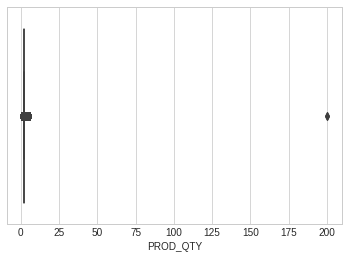

In [ ]:
sns.boxplot(x='PROD_QTY', data=x) #detecting outlier in PROD_QTY

**This is also extreme Outliers. That's the reason normal 0.99 quantile and 75 quartile(IQR) functions won't work.**
So I tried qunatile of 0.999.

In [ ]:
# Calculate the 1st and 99th percentiles
p1 = x['PROD_QTY'].quantile(0.01)
p99 = x['PROD_QTY'].quantile(0.999)

# Filter the dataframe to get the extreme outliers
outliers_qty = x[(x['PROD_QTY'] < p1) | (x['PROD_QTY'] > p99)]

In [ ]:
outliers_qty.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [ ]:
x[x['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [ ]:
x[x['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


### **As we saw both the outlier is by a single customer which we confirmed from the LYLTY_CARD_NBR ,we drop the two Outliers.**

In [ ]:
x = x.drop(x[x['PROD_QTY'] == 200].index)

In [ ]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [ ]:
x.DATE.nunique() #Checking Number of unique DATE entries expected is 365 days of a year

364

### **As we have 364 dates, so we are missing 1 date. Creating a list of Dates to compare and append the misisng date.**

In [ ]:
# Create a list of all the dates in the desired range
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30')

# Check if the length of the 'DATE' column is equal to the expected number of dates
if len(x['DATE']) == len(all_dates):
    print("All dates are present in the 'DATE' column")
else:
    print("There are missing dates in the 'DATE' column")

There are missing dates in the 'DATE' column


In [ ]:
missing_dates = all_dates[~all_dates.isin(x['DATE'])]
print("The following dates are missing:", missing_dates)

The following dates are missing: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


**We can see as all the stores are closed on Christmas that is the reason sales are 0 on that day.** 

We will set the TOT_SALES to 0 and remove the NaN value.

In [ ]:
# Create a new row with the missing date and TOT_SALES value of 0
missing_date_row = pd.DataFrame({'DATE': ['2018-12-25'], 'TOT_SALES': [0]})

# Concatenate the new row with the existing dataframe
x = pd.concat([x, missing_date_row])

In [ ]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17 00:00:00,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0
1,2019-05-14 00:00:00,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0
2,2019-05-20 00:00:00,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0
3,2018-08-17 00:00:00,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0
4,2018-08-18 00:00:00,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0


In [ ]:
x = x.reset_index(drop=True)

(737029.0, 737060.0)

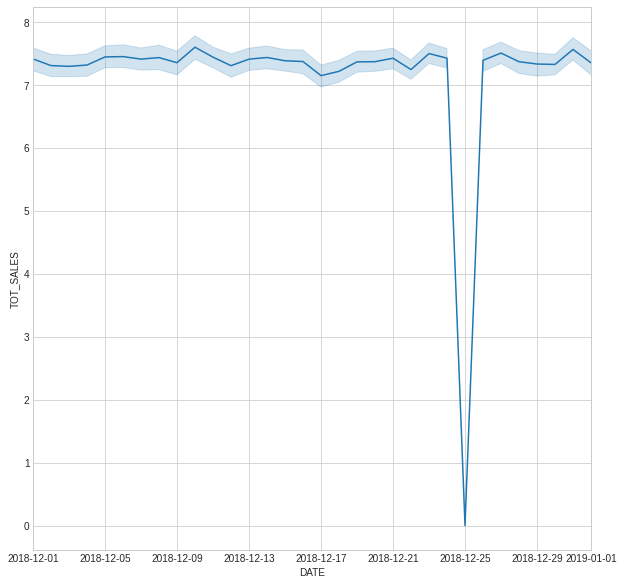

In [ ]:
# Convert the DATE column to a datetime type
x['DATE'] = pd.to_datetime(x['DATE'])

# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x).axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2018-12-01'), pd.Timestamp('2019-01-01'))

### **Now we get Number of Transactions by counting the duplicates from DATE column and plotting it.**

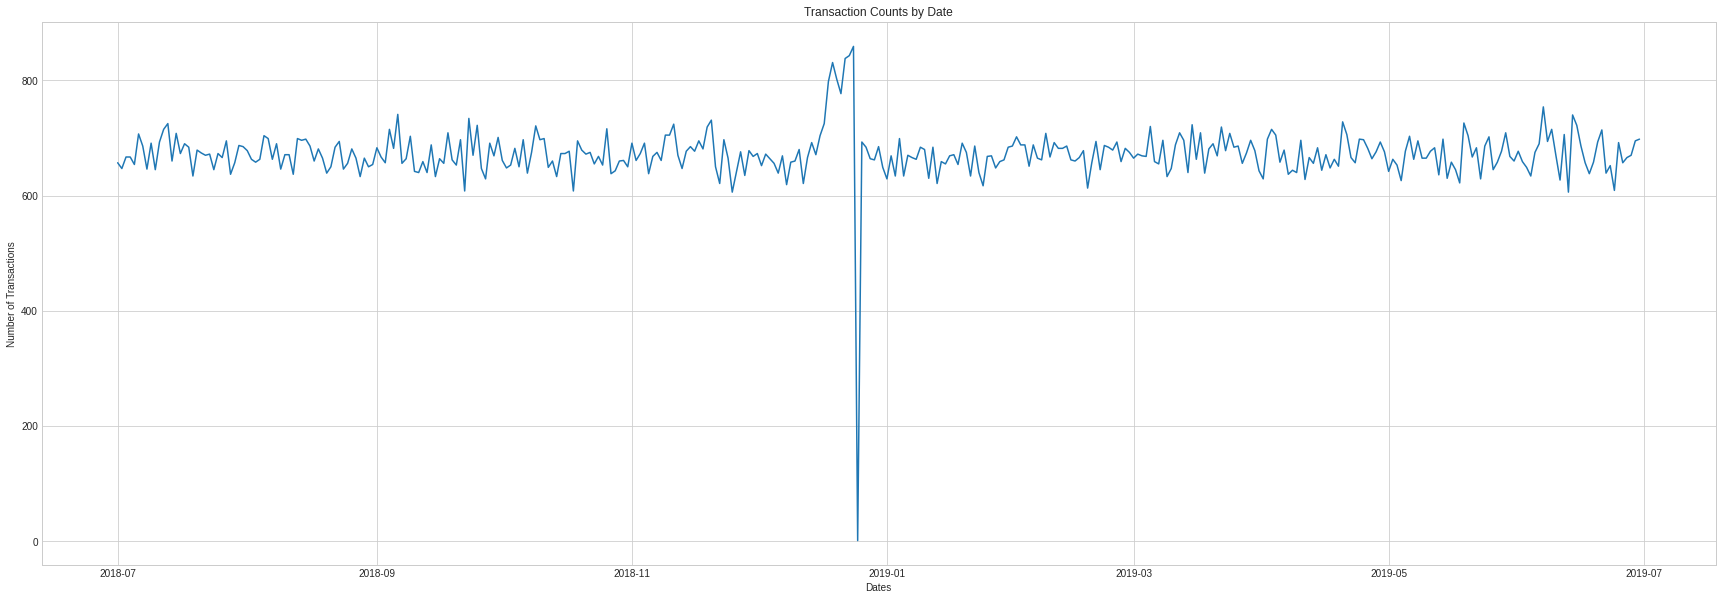

In [ ]:
sorted_x = x.sort_values(by='DATE')
grouped = sorted_x.groupby(by='DATE').size()
transactions = grouped.values
dates = grouped.index
plt.figure(figsize=(30,10))
plt.plot(dates, transactions)
plt.xlabel('Dates')
plt.ylabel('Number of Transactions')
plt.title('Transaction Counts by Date')
plt.show()

Clearly there's a lot of sales during christmas season and has a fall on 25th Dec as the stores are all closed. So no Transactions.

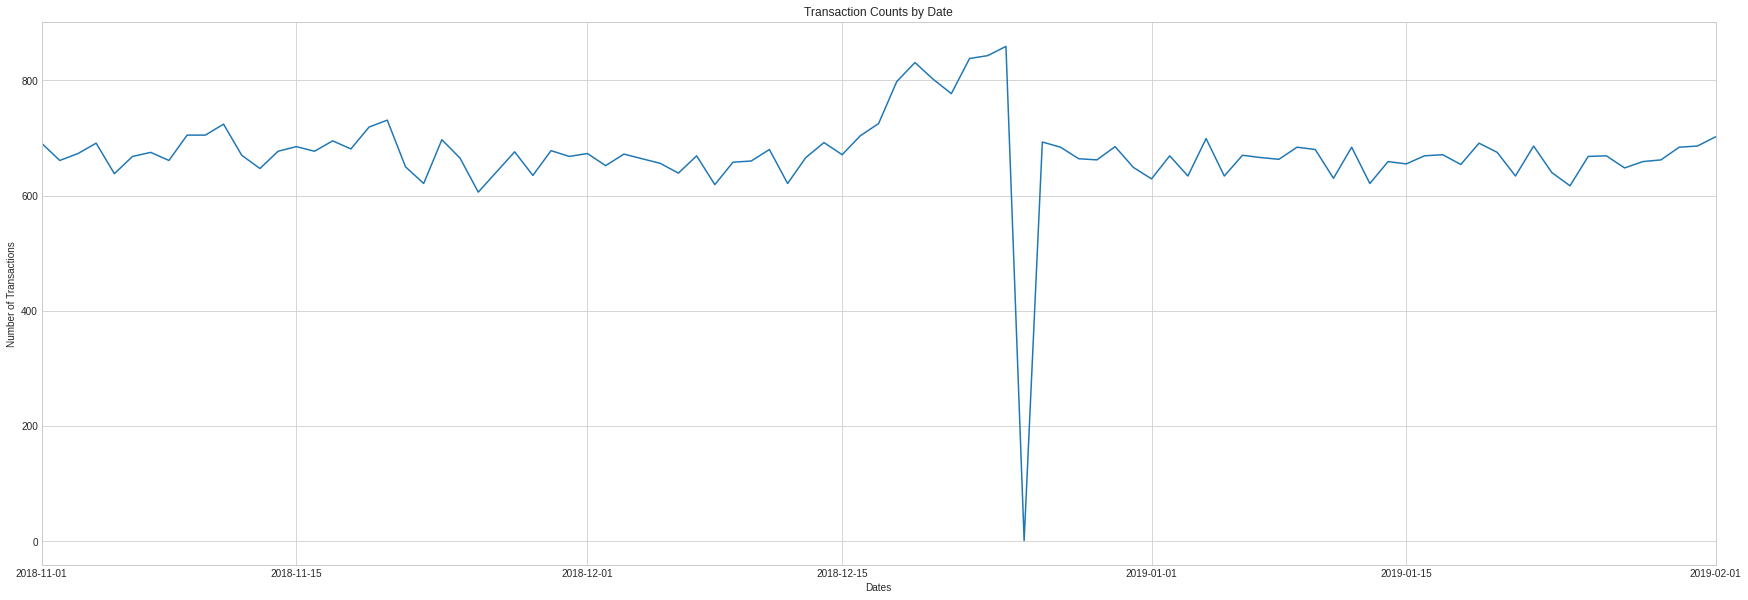

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.lineplot(x=dates, y=transactions).axes
plt.xlabel('Dates')
plt.ylabel('Number of Transactions')
plt.title('Transaction Counts by Date')
# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2018-11-01'), pd.Timestamp('2019-02-01'))
plt.show()

### **Plot of TOT_SALES vs DATE**

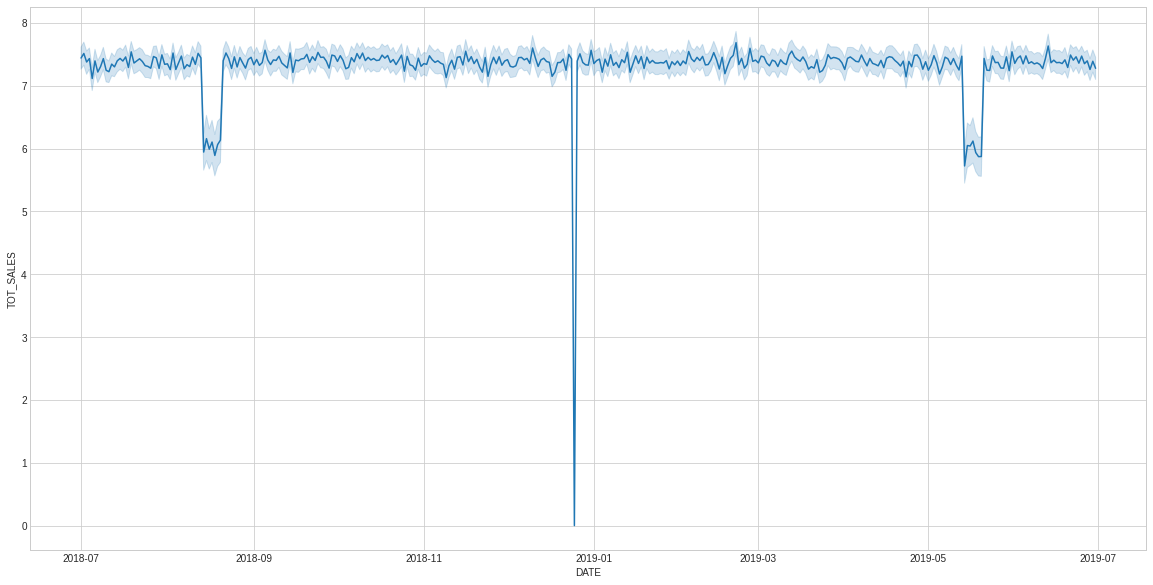

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='DATE', y='TOT_SALES', data=x)

**As we See there are some fall in Sales between July 2018 and September 2018.** 

(736876.0, 736938.0)

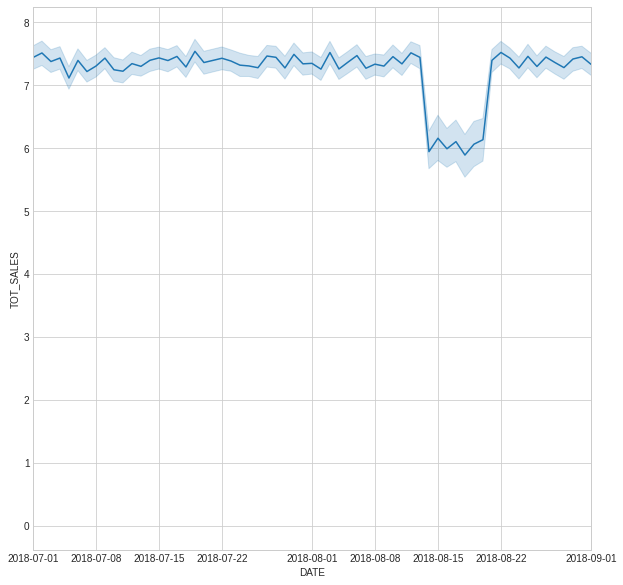

In [ ]:
# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x).axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2018-07-01'), pd.Timestamp('2018-09-01'))

**And also between May, 2019 and July,2019.**

(737180.0, 737241.0)

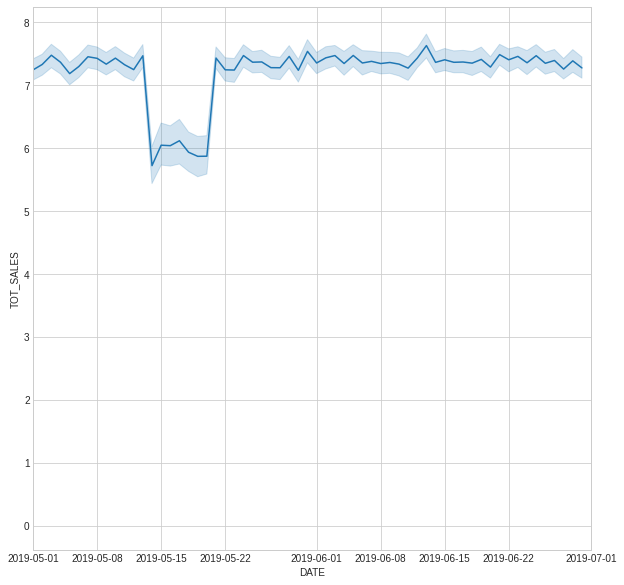

In [ ]:
# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x).axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2019-07-01'))

**Sales between December 2018 to 1st Jan. We got the highest Sales due to Christmas.**

(737029.0, 737060.0)

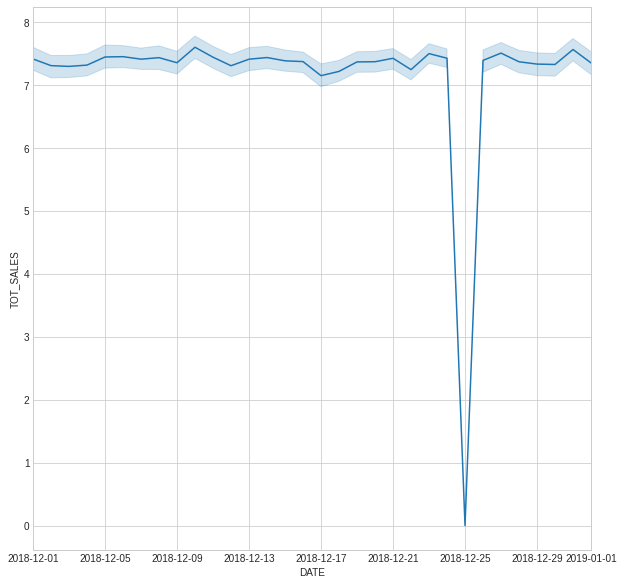

In [ ]:
# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x).axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2018-12-01'), pd.Timestamp('2019-01-01'))

In [ ]:
x.dtypes

DATE              datetime64[ns]
STORE_NBR                float64
LYLTY_CARD_NBR           float64
TXN_ID                   float64
PROD_NBR                 float64
PROD_NAME                 object
PROD_QTY                 float64
TOT_SALES                float64
package_weight           float64
dtype: object

In [ ]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0


###**Creating Brand Name from the first Words**

In [ ]:
x['BRAND'] = x['PROD_NAME'].str.split().str[0]

In [ ]:
x['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites', nan], dtype=object)

###But some Brand names are the same like Natural and NCC , Infuzions and Infzns , Red and RRD, Snbts and Sunbites ,etc. So, it needs to be equal.

In [ ]:
x['BRAND'] = x['BRAND'].replace({'NCC': 'Natural', 'Infzns': 'Infuzions', 'RRD': 'Red', 'Snbts': 'Sunbites','Dorito':'Doritos','Smith': 'Smiths','GrnWves': 'Grain'})

In [ ]:
x['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'Cheezels', 'Infuzions',
       'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French', 'Tostitos',
       'Cheetos', 'Woolworths', 'Sunbites', nan], dtype=object)

##**Time to deal with Customer Data**

In [ ]:
cd.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
cd.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

###There are no null values in our customer data.

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245303 entries, 0 to 245302
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            245303 non-null  datetime64[ns]
 1   STORE_NBR       245302 non-null  float64       
 2   LYLTY_CARD_NBR  245302 non-null  float64       
 3   TXN_ID          245302 non-null  float64       
 4   PROD_NBR        245302 non-null  float64       
 5   PROD_NAME       245302 non-null  object        
 6   PROD_QTY        245302 non-null  float64       
 7   TOT_SALES       245303 non-null  float64       
 8   package_weight  245302 non-null  float64       
 9   BRAND           245302 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.7+ MB


In [ ]:
# Create a new dataframe z by merging x and cd on the shared columns
shared_columns = list(set(x.columns) & set(cd.columns))
z = pd.merge(x, cd, on=shared_columns, how='left')

In [ ]:
z.isnull().sum()

DATE                0
STORE_NBR           1
LYLTY_CARD_NBR      1
TXN_ID              1
PROD_NBR            1
PROD_NAME           1
PROD_QTY            1
TOT_SALES           0
package_weight      1
BRAND               1
LIFESTAGE           1
PREMIUM_CUSTOMER    1
dtype: int64

We know there is 1 null value on 25th Dec as it was Christmas.

In [ ]:
z.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


Time to save the whole dataframe z as .csv file. 

In [ ]:
z.to_csv('QVI_data.csv')
!cp QVI_data.csv "/content/drive/MyDrive/"

#Time for Data Analysis of the customer segment.
- ## Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is.
##**Total sales by LIFESTAGE and PREMIUM_CUSTOMER**

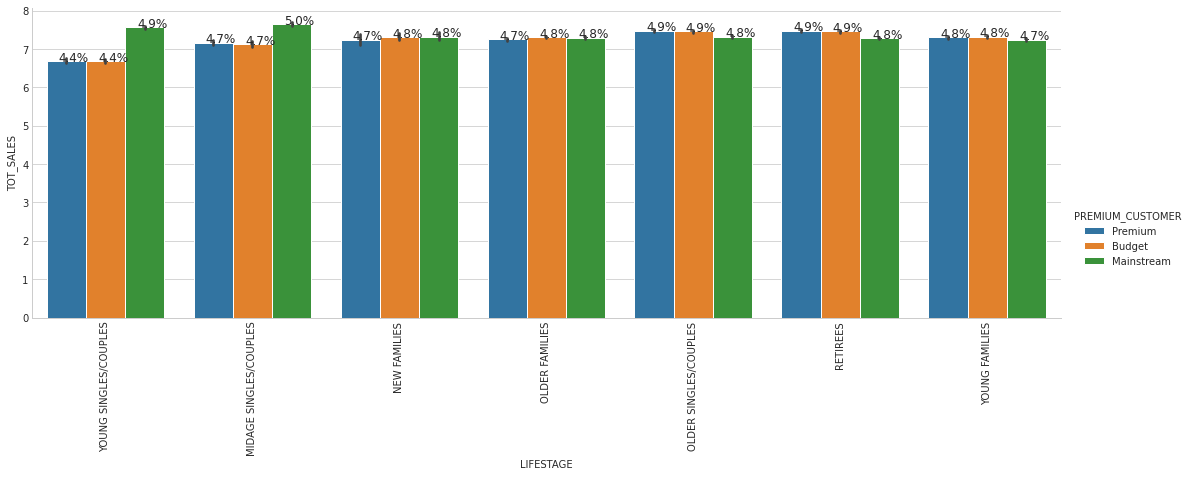

Text(0.5, 1.05, 'Sales by LIFESTAGE and PREMIUM_CUSTOMER')

In [ ]:

sns.set_style("whitegrid")
g = sns.catplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', kind='bar', height=5, aspect=3, data=z)

# Calculate percentages and add to the plot
totals = []
for i, ax in enumerate(g.axes.flat):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for p in ax.patches:
        totals.append(p.get_height())
    total = sum(totals)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    totals = []
    
plt.show()

# Set labels and title
g.set_xlabels('LIFESTAGE')
g.set_ylabels('Number of Sales')
g._legend.set_title('PREMIUM_CUSTOMER')
g.fig.suptitle('Sales by LIFESTAGE and PREMIUM_CUSTOMER', y=1.05)

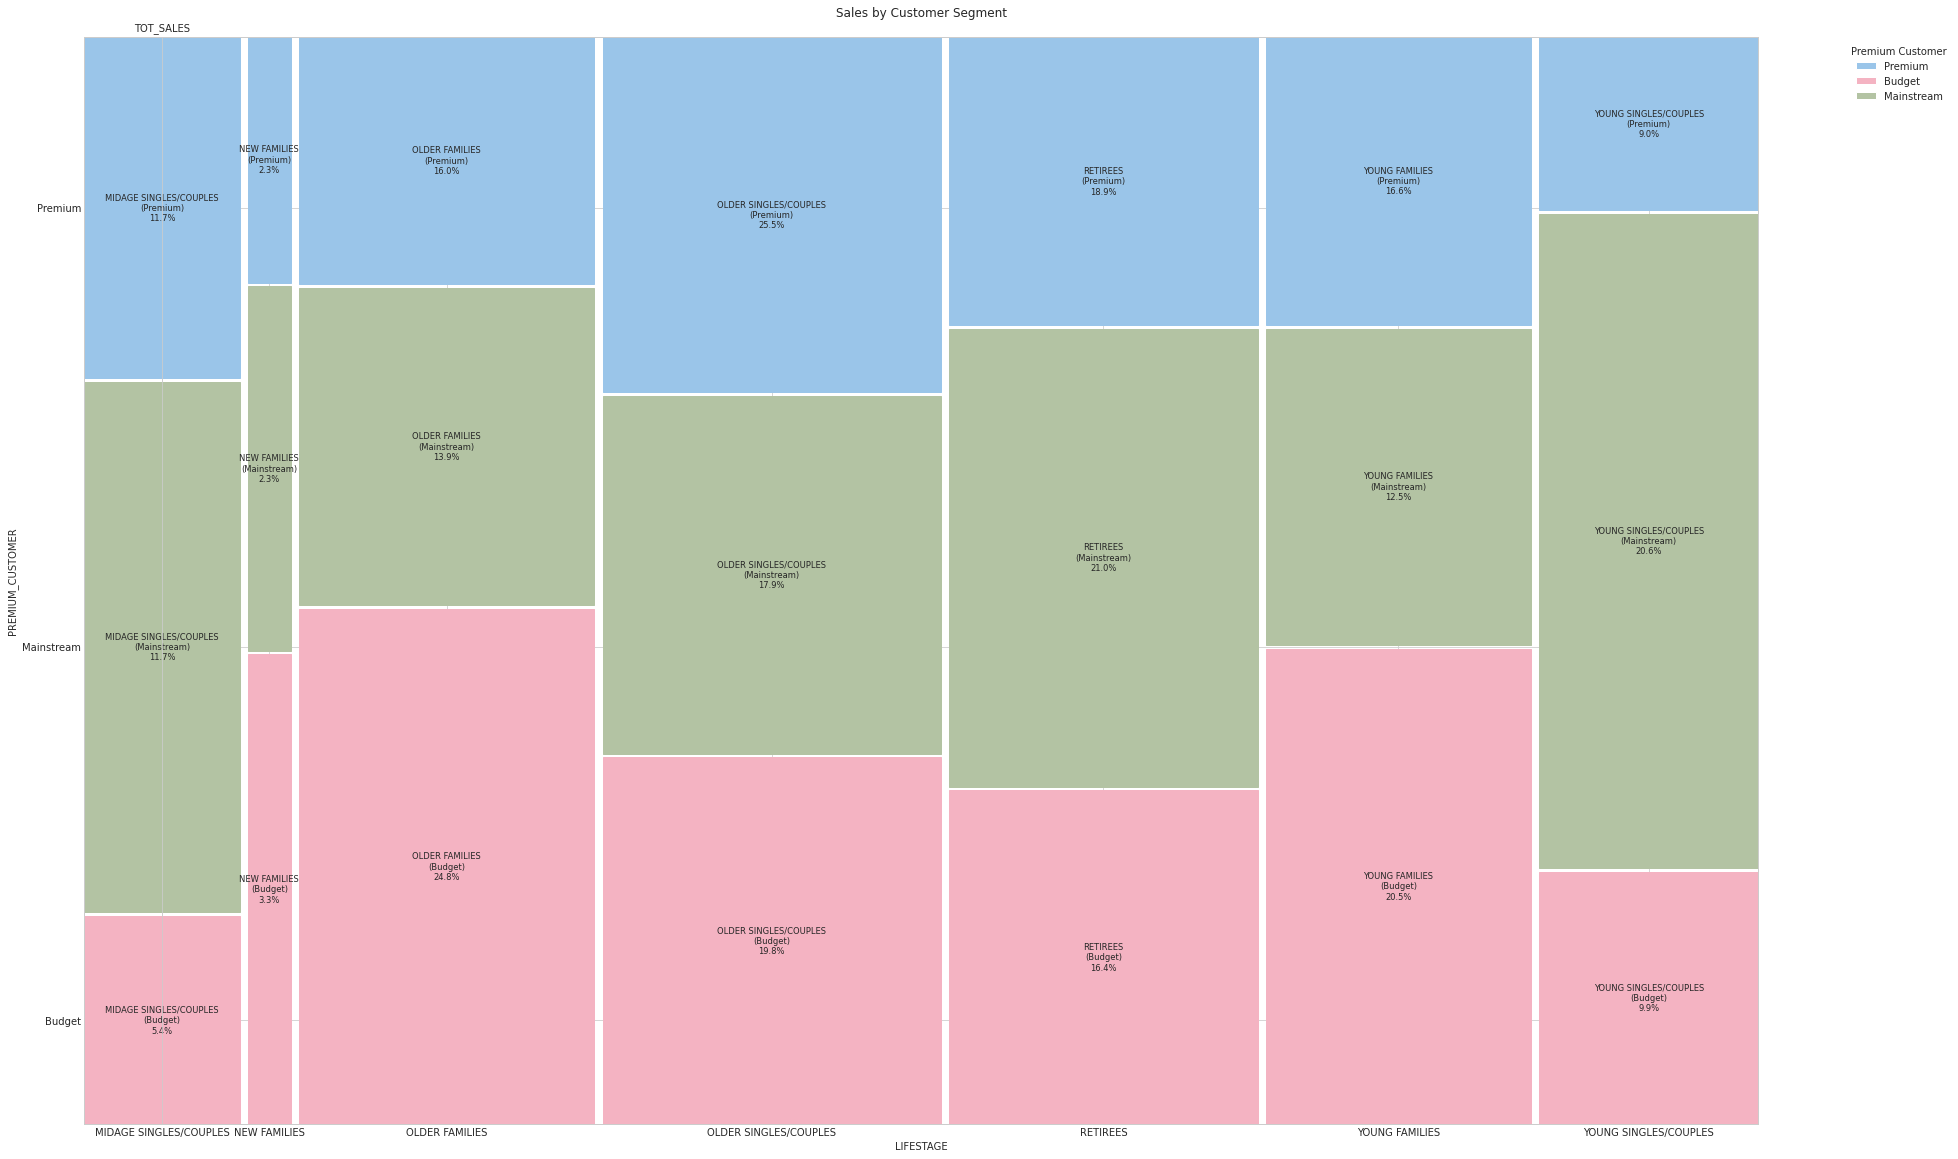

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.patches as mpatches

# Define the color map
colors = {
    'Premium': '#9AC5E9',
    'Budget': '#F4B3C2',
    'Mainstream': '#B3C3A3'
}
# Compute the cross-tabulation
crosstab = pd.crosstab(index=[z['LIFESTAGE'], z['PREMIUM_CUSTOMER']], columns='TOT_SALES', values=z['TOT_SALES'], aggfunc=sum)

# Compute the percentages of PREMIUM_CUSTOMER
premium_customer_percents = pd.crosstab(index=z['LIFESTAGE'], columns=z['PREMIUM_CUSTOMER'], normalize='columns') * 100

# Create the mosaic plot
fig, ax = plt.subplots(figsize=(30, 20))
mosaic(crosstab.stack(), labelizer=lambda k: f"{k[0]}\n({k[1]})\n{premium_customer_percents.loc[k[0], k[1]]:.1f}%",
       properties=lambda *args: {'color': colors[args[0][1]]}, ax=ax)
# Create a custom legend
handles = [mpatches.Patch(facecolor=color, label=label) for label, color in colors.items()]
plt.legend(handles=handles, title='Premium Customer', loc='upper left', bbox_to_anchor=(1.05, 1))

# Set the title and axis labels
ax.set_title('Sales by Customer Segment')
ax.set_xlabel('LIFESTAGE')
ax.set_ylabel('PREMIUM_CUSTOMER')

# Display the plot
plt.show()


In [ ]:
crosstab

col_0                                    TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33150.70
                       Mainstream         84500.25
                       Premium            54254.05
NEW FAMILIES           Budget             20534.65
                       Mainstream         15935.50
                       Premium            10732.20
OLDER FAMILIES         Budget            156096.75
                       Mainstream         96059.95
                       Premium            74899.40
OLDER SINGLES/COUPLES  Budget            127279.80
                       Mainstream        124089.50
                       Premium           123147.55
RETIREES               Budget            105586.10
                       Mainstream        144677.55
                       Premium            91013.25
YOUNG FAMILIES         Budget            129151.15
                       Mainstream         85919.65
                       Premium            78176.50
YOUNG SINGLES/COUPLES  Budget             56807.50
                       Mainstream        147244.20
                       Premium            38875.50

###**Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees**

##Let’s see if the higher sales are due to there being more customers who buy chips.
- ### **How many customers are in each segment, Number of customers by LIFESTAGE and PREMIUM_CUSTOMER**

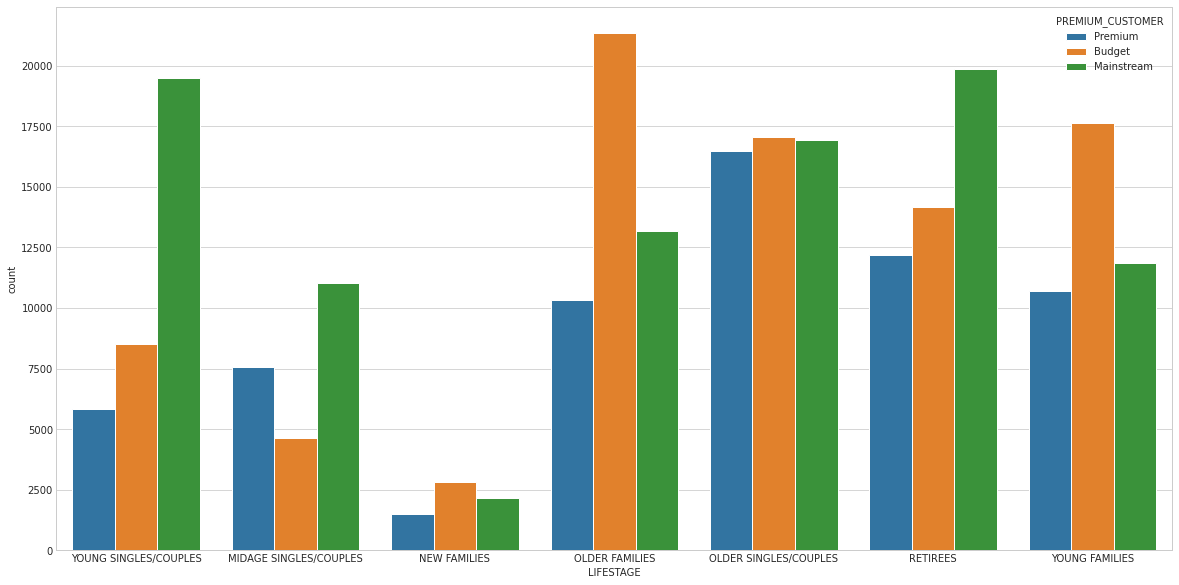

In [ ]:
# Create the countplot
plt.figure(figsize=(20,10))
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=z)

# Show the plot
plt.show()

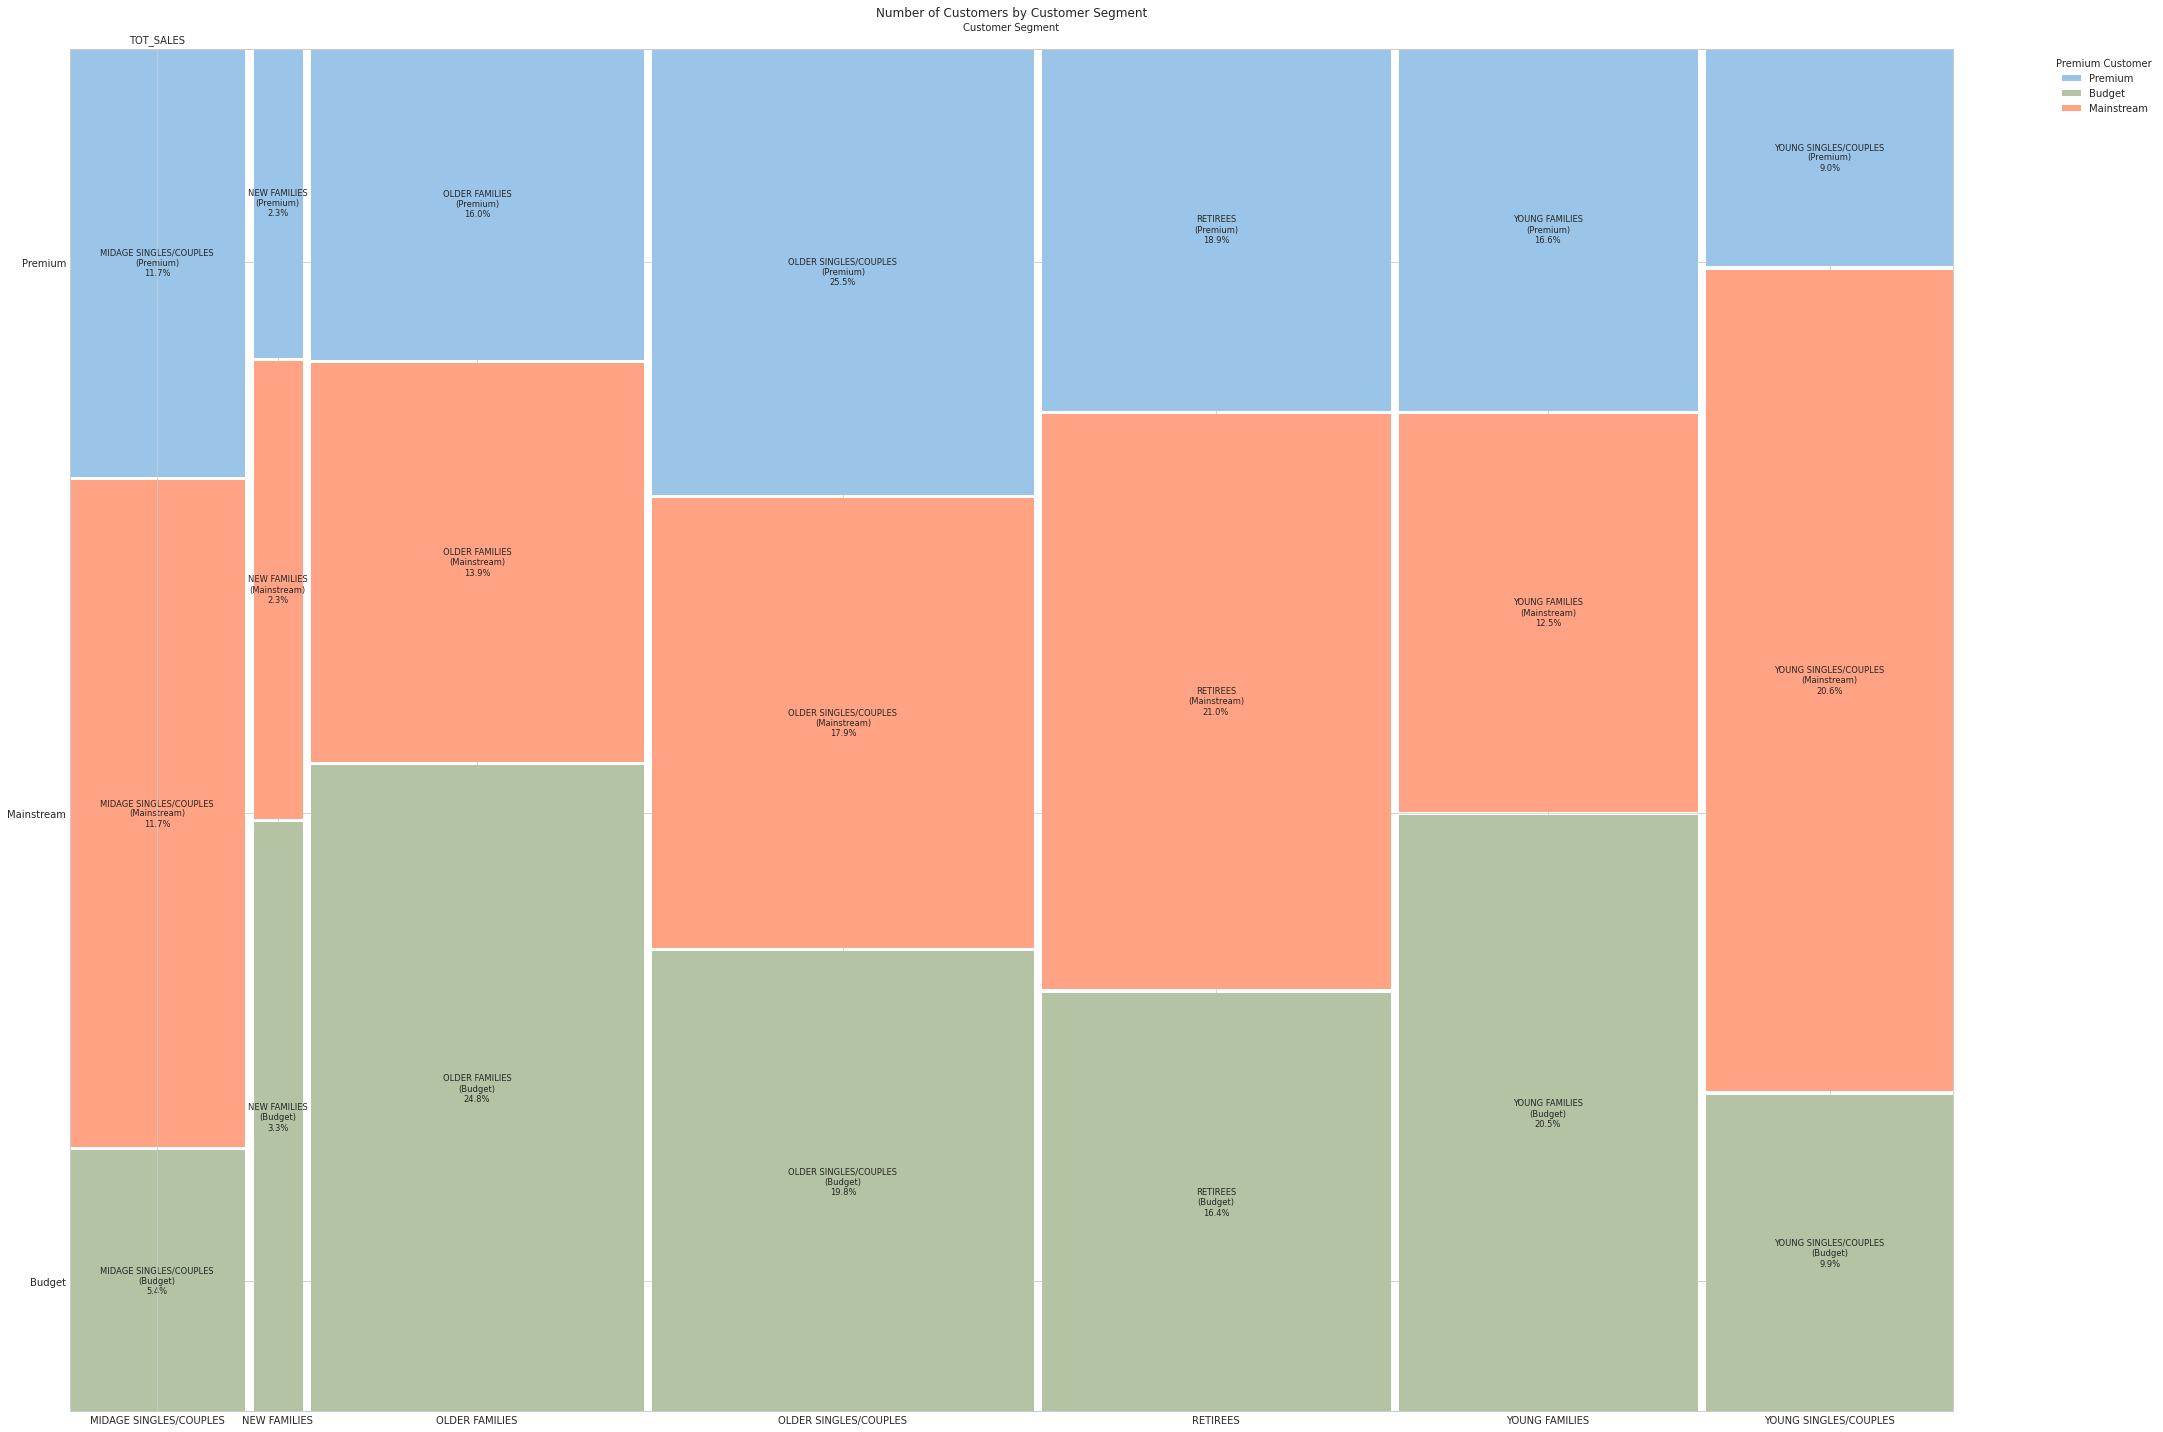

In [ ]:
# Calculate the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
num_customers = pd.crosstab(index=z['LIFESTAGE'], columns=z['PREMIUM_CUSTOMER'], margins=True, margins_name='Total')

# Compute the cross-tabulation of TOT_SALES by LIFESTAGE and PREMIUM_CUSTOMER
crosstab = pd.crosstab(index=[z['LIFESTAGE'], z['PREMIUM_CUSTOMER']], columns='TOT_SALES', values=z['TOT_SALES'], aggfunc=sum)

# Compute the percentages of PREMIUM_CUSTOMER
premium_customer_percents = pd.crosstab(index=z['LIFESTAGE'], columns=z['PREMIUM_CUSTOMER'], normalize='columns') * 100
# Define colors for each premium customer category
colors = {'Premium': '#9AC5E9', 'Budget': '#B3C3A3', 'Mainstream': '#FFA384'}

# Create the mosaic plot
fig, axes = plt.subplots(figsize=(30,20))
mosaic(crosstab.stack(), labelizer=lambda k: f"{k[0]}\n({k[1]})\n{premium_customer_percents.loc[k[0], k[1]]:.1f}%", 
       properties=lambda *args: {'color': colors[args[0][1]]}, ax=axes)
# Create a custom legend
handles = [mpatches.Patch(facecolor=color, label=label) for label, color in colors.items()]
plt.legend(handles=handles, title='Premium Customer', loc='upper left', bbox_to_anchor=(1.05, 1))

# Set the title and axis labels
plt.title('Number of Customers by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [ ]:
num_customers

PREMIUM_CUSTOMER,Budget,Mainstream,Premium,Total
LIFESTAGE,,,,
MIDAGE SINGLES/COUPLES,4651,11048,7574,23273
NEW FAMILIES,2808,2176,1482,6466
OLDER FAMILIES,21363,13169,10333,44865
OLDER SINGLES/COUPLES,17061,16948,16480,50489
RETIREES,14156,19870,12177,46203
YOUNG FAMILIES,17650,11863,10706,40219
YOUNG SINGLES/COUPLES,8502,19472,5813,33787
Total,86191,94546,64565,245302


**There's Max number of Customer from Older Families Lifestage of budget category and lowest is New Families.
There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget- Older families segment.**

##**How many chips are bought per customer by segment,Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER**

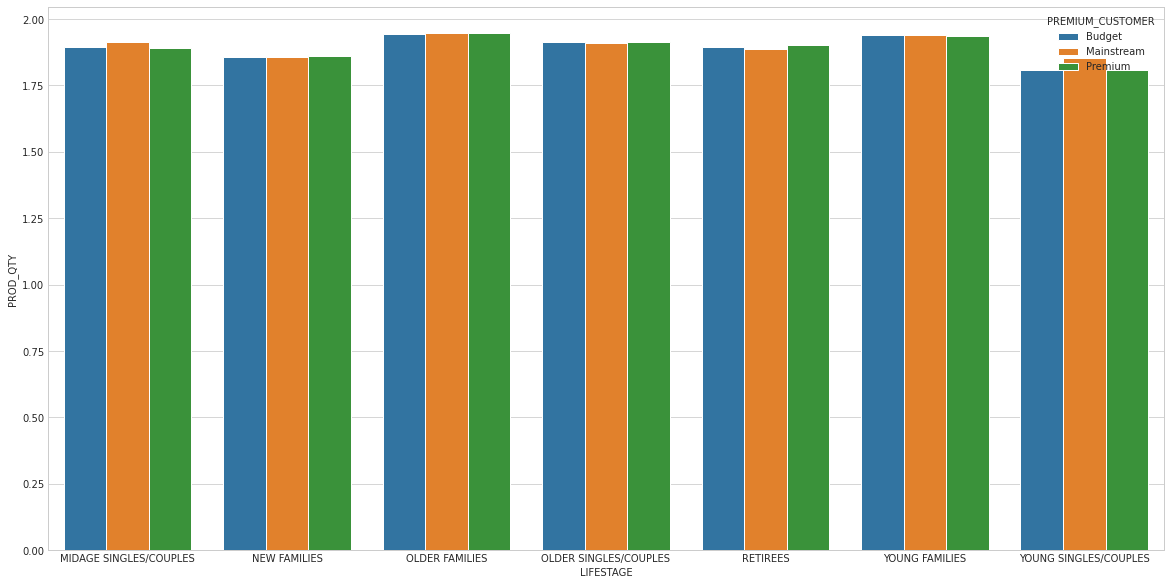

In [ ]:
# Group the data by LIFESTAGE and PREMIUM_CUSTOMER, and calculate the mean of PROD_QTY
mean_prod_qty = z.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Plot the mean PROD_QTY for each group
plt.figure(figsize=(20,10))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=mean_prod_qty)

###**Older and Young families buy in general buy more chips per customer**

### **What's the average chip price by customer segment? Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER.**


Text(0.5, 1.0, 'Average Sales Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')

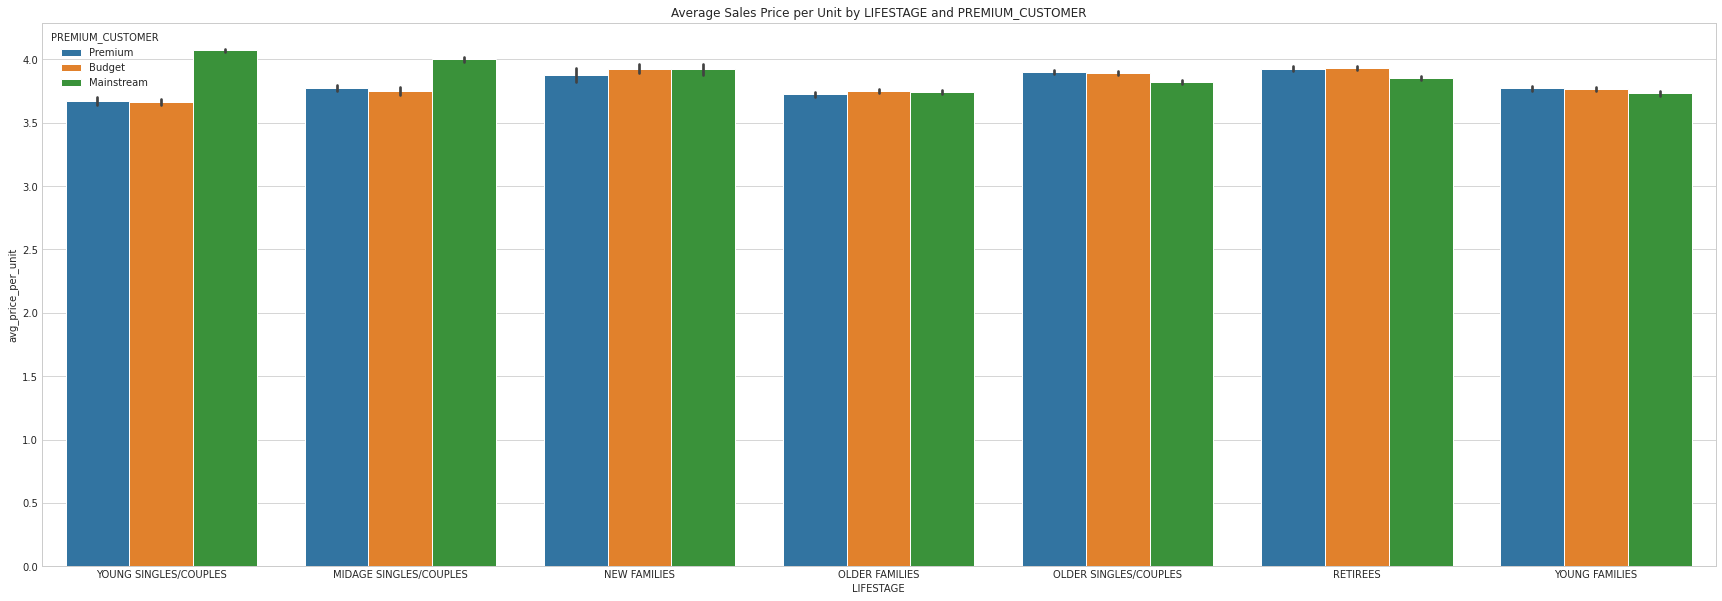

In [ ]:
# Calculate the average sales price per unit
z['avg_price_per_unit'] = z['TOT_SALES'] / z['PROD_QTY']
# Set the figure size to 10x10 inches
plt.figure(figsize=(30, 10))
# Plot the average sales price per unit
sns.barplot(x='LIFESTAGE', y='avg_price_per_unit', hue='PREMIUM_CUSTOMER', data=z)
# Add a title to the plot
plt.title('Average Sales Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')

### **Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.**

##**Perform an independent t-test between mainstream vs premium and budget for midage.** 

In [ ]:
z.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,avg_price_per_unit
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [ ]:
midage_singles_couples = z[z['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']
mainstream = midage_singles_couples[midage_singles_couples['PREMIUM_CUSTOMER'] == 'Mainstream']
premium = midage_singles_couples[midage_singles_couples['PREMIUM_CUSTOMER'] == 'Premium']
budget = midage_singles_couples[midage_singles_couples['PREMIUM_CUSTOMER'] == 'Budget']

**t-statistic and p-value of mainstream and premium**

In [ ]:
t_statistic, p_value = ttest_ind(mainstream['TOT_SALES'], premium['TOT_SALES'])

In [ ]:
print(p_value)

9.360185721288574e-40


In [ ]:
print(t_statistic)

13.226207667846136


**t-statistic and p-value of mainstream and budget**

In [ ]:
t_statistic, p_value = ttest_ind(mainstream['TOT_SALES'],budget['TOT_SALES'])
print(p_value)
print(t_statistic)

4.519276080440848e-34
12.198439870124963


**Now We T-test for Young Singles/Couples**

In [ ]:
young_singles_couples = z[z['LIFESTAGE']=='YOUNG SINGLES/COUPLES']
mainstream_y = young_singles_couples[young_singles_couples['PREMIUM_CUSTOMER'] == 'Mainstream']
premium_y = young_singles_couples[young_singles_couples['PREMIUM_CUSTOMER'] == 'Premium']
budget_y = young_singles_couples[young_singles_couples['PREMIUM_CUSTOMER'] == 'Budget']

**t-statistic and p-value of mainstream and budget**

In [ ]:
t_statistic, p_value = ttest_ind(mainstream_y['TOT_SALES'],budget_y['TOT_SALES'])
print(p_value)
print(t_statistic)

1.84274506898073e-157
26.90699431100381


**t-statistic and p-value of mainstream and premium**

In [ ]:
t_statistic, p_value = ttest_ind(mainstream_y['TOT_SALES'],premium_y['TOT_SALES'])
print(p_value)
print(t_statistic)

3.422052038491271e-119
23.33673787758433


In [ ]:
z

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,avg_price_per_unit
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245298,2018-08-13,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime,1.0,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40
245299,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana,2.0,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40
245300,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno,2.0,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90
245301,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime,2.0,8.8,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40


###**The t-test results in a p-value of less than 0.05 so there is statistically significant difference between the two groups, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.**

##**To see which Brands are the most popular among the mainstream Young Singles/Couples**




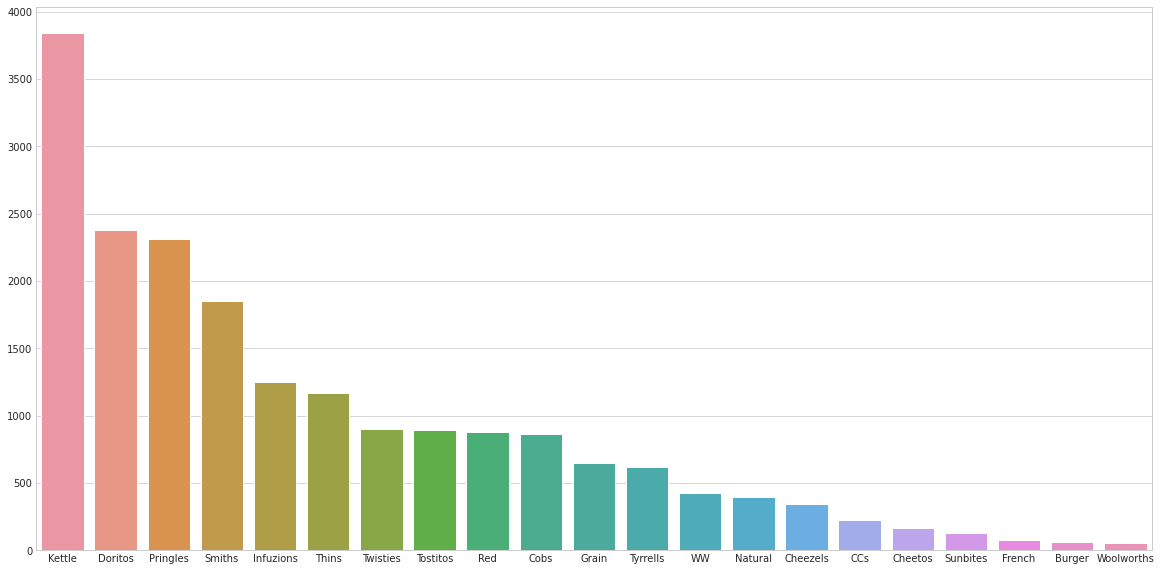

In [ ]:
# Get the value counts for the 'BRAND' column
brand_counts = mainstream_y['BRAND'].value_counts()
plt.figure(figsize=(20,10))
# Plot the value counts as a barplot
sns.barplot(x=brand_counts.index, y=brand_counts.values)

As We can see Kettle and Doritos are the highest selling Brands closely followed by Pringles.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
# Subset the data for Mainstream Young Singles/Couples segment and other segments
segment1 = z[(z['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (z['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = z[~((z['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (z['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Calculate total quantity for each segment
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Calculate brand affinity compared to the rest of the population
quantity_segment1_by_brand = segment1.groupby('BRAND').agg(targetSegment=('PROD_QTY', 'sum')) / quantity_segment1
quantity_other_by_brand = other.groupby('BRAND').agg(other=('PROD_QTY', 'sum')) / quantity_other
brand_proportions = quantity_segment1_by_brand.merge(quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

print(brand_proportions)

            targetSegment     other  affinityToBrand
BRAND                                               
Tyrrells         0.031666  0.025846         1.225194
Twisties         0.046350  0.038103         1.216439
Doritos          0.123203  0.101679         1.211684
Kettle           0.198698  0.166543         1.193072
Tostitos         0.045574  0.038205         1.192889
Pringles         0.119850  0.101236         1.183867
Cobs             0.044798  0.039282         1.140424
Infuzions        0.064912  0.057406         1.130757
Thins            0.060590  0.057327         1.056921
Grain            0.032830  0.031374         1.046396
Cheezels         0.018036  0.018758         0.961477
Smiths           0.093115  0.119351         0.780184
French           0.003962  0.005792         0.683950
Cheetos          0.008062  0.012139         0.664160
Red              0.043967  0.067897         0.647558
Natural          0.019670  0.031038         0.633741
CCs              0.011220  0.019009         0.

###**We can see that :**
 **• Mainstream young singles/couples are 22.5% more likely to purchase Tyrrells chips compared to the rest of the population** 

 **• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population**

<Figure size 1440x720 with 0 Axes>

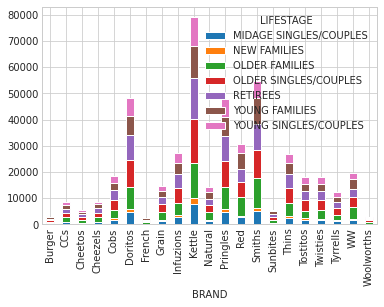

In [ ]:
# Create a pivot table showing the total number of chips bought by each BRAND for each customer segment
pivot_table = z.pivot_table(index='BRAND', columns='LIFESTAGE', values='PROD_QTY', aggfunc='sum')
# Plot the results as a bar chart
pivot_table.plot(kind='bar', stacked=True)

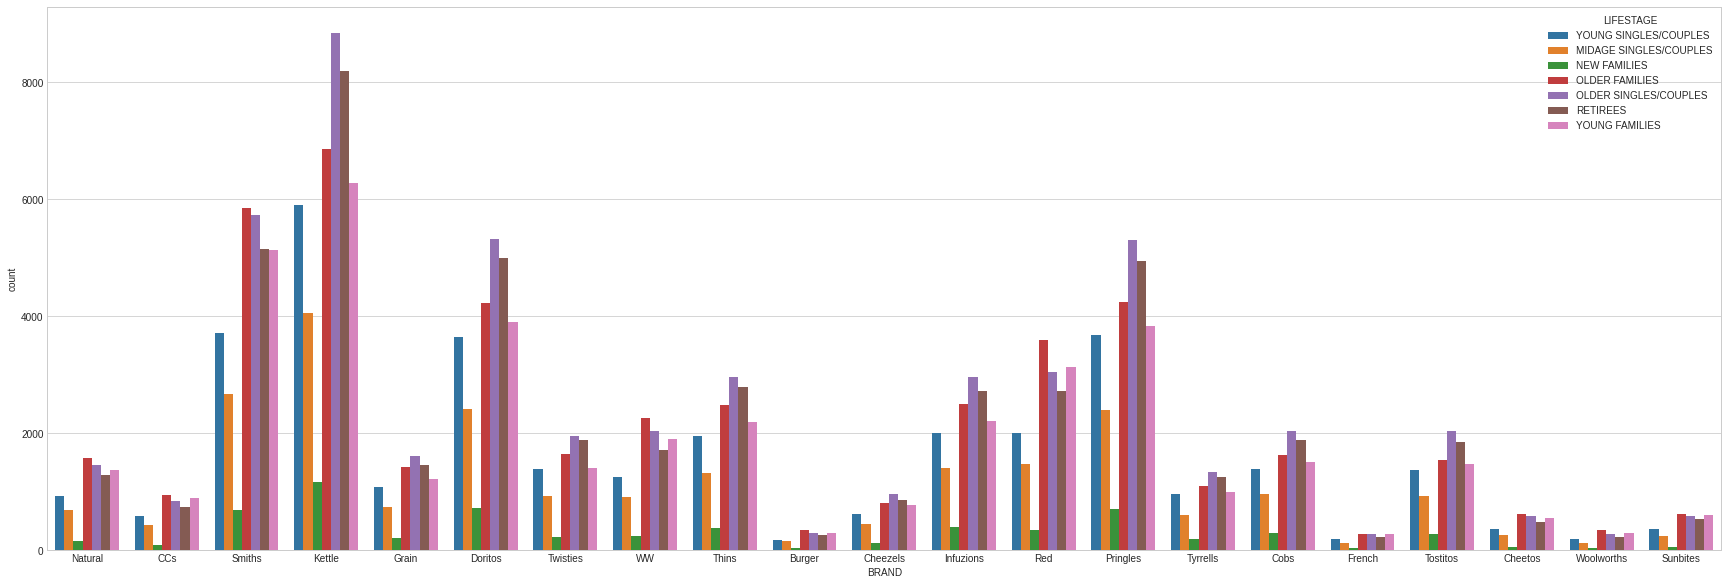

In [ ]:
plt.figure(figsize=(30, 10))

# Plot the pivot plot
sns.countplot(x='BRAND', hue='LIFESTAGE', data=z)

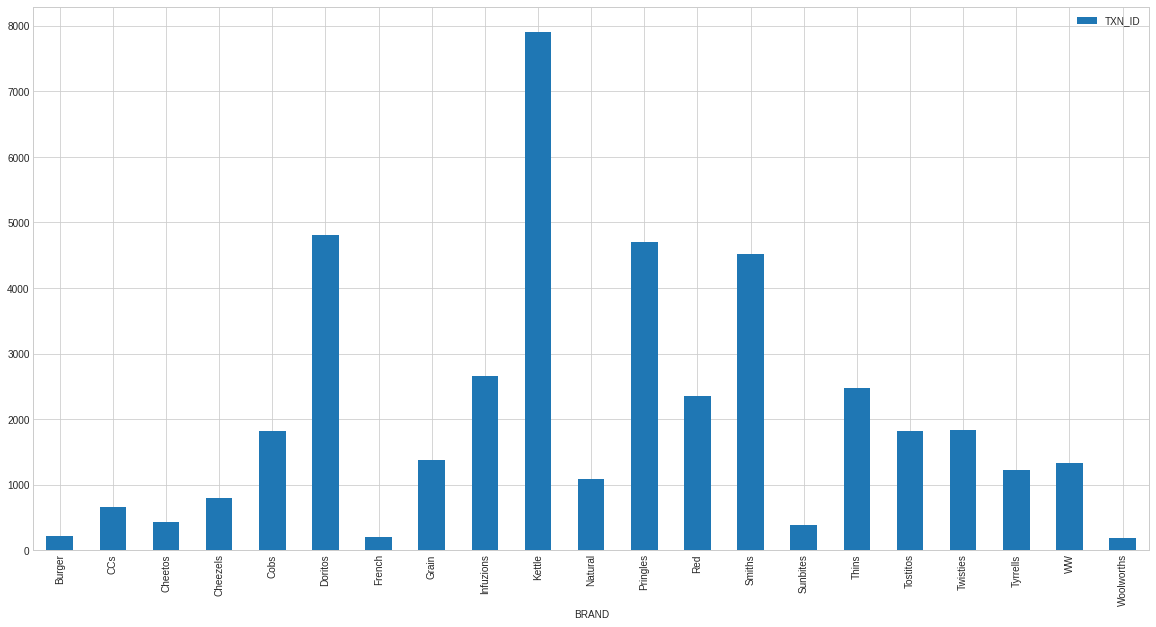

In [ ]:
# Filter the data to include only rows with 'MIDAGE SINGLES/COUPLES' and 'YOUNG SINGLES/COUPLES' customer segments and 'Mainstream' premium customers
filtered_data = z[(z['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (z['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (z['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Create a pivot table to count the number of occurrences of each brand
pivot = pd.pivot_table(filtered_data, index='BRAND', values='TXN_ID', aggfunc='count')

# Plot the pivot table as a bar plot
pivot.plot(kind='bar', figsize=(20,10))

Young and Midage Singles/Couples groups love Kettle and Doritos

In [ ]:
mainstream_y.head()


,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,avg_price_per_unit
220018,220018,2018-08-16,1.0,1020.0,26.0,19.0,Smiths Crinkle Cut SnagSauce,1.0,2.6,150.0,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
220019,220019,2018-08-17,1.0,1163.0,188.0,46.0,Kettle Original,1.0,5.4,175.0,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
220020,220020,2018-08-14,1.0,1291.0,333.0,27.0,WW Supreme Cheese Corn Chips,1.0,1.9,200.0,WW,YOUNG SINGLES/COUPLES,Mainstream,1.9
220021,220021,2019-05-15,3.0,3031.0,1227.0,14.0,Smiths Crnkle Chip Orgnl Big Bag,1.0,5.9,380.0,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
220022,220022,2019-05-18,3.0,3118.0,1574.0,62.0,Pringles Mystery Flavour,1.0,3.7,134.0,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


## **Looking through package_size per brands for Young Singles/Couples**

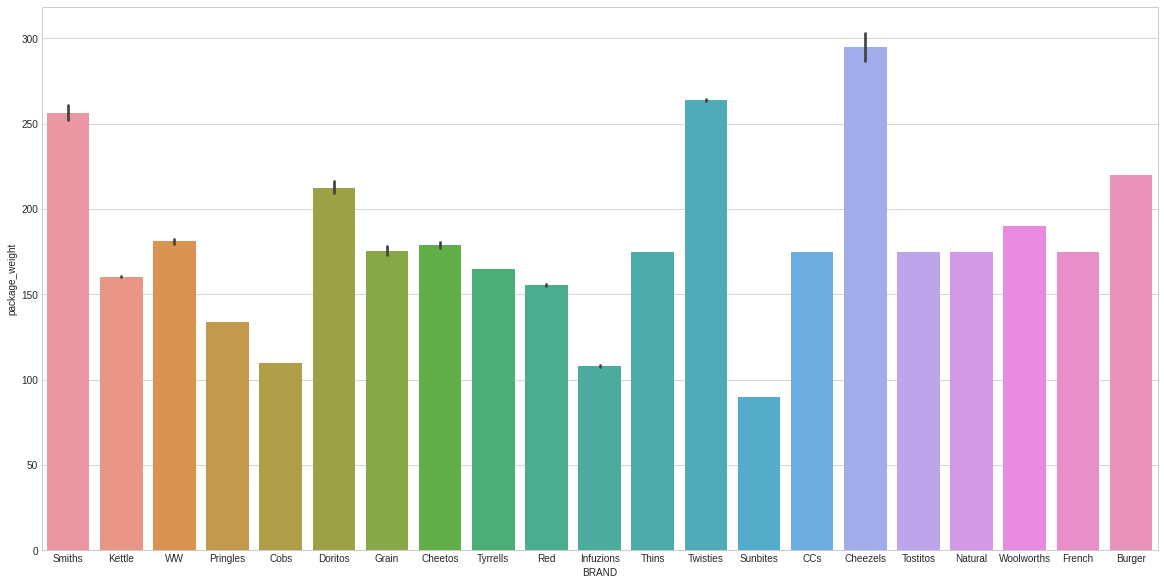

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='BRAND', y= 'package_weight', data= mainstream_y)

**It's clear that for Brands like Smiths,Cheezles, Twisties are the top preffered for large sized chips.**


In [ ]:
# Create dataframes for the target segment and the other segments
segment1 = z[(z['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (z['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = z[~((z['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (z['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Calculate the total quantity for each segment
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Calculate the proportion of each pack size for each segment
quantity_segment1_by_pack = segment1.groupby('package_weight').agg(targetSegment=('PROD_QTY', 'sum')) / quantity_segment1
quantity_other_by_pack = other.groupby('package_weight').agg(other=('PROD_QTY', 'sum')) / quantity_other

# Merge the dataframes and calculate the affinity to each pack size
pack_proportions = quantity_segment1_by_pack.merge(quantity_other_by_pack, on='package_weight', how='outer')
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']
pack_proportions = pack_proportions.sort_values('affinityToPack', ascending=False)

print(pack_proportions)

                targetSegment     other  affinityToPack
package_weight                                         
270.0                0.031943  0.025246        1.265291
380.0                0.032276  0.025737        1.254060
330.0                0.061504  0.050462        1.218831
134.0                0.119850  0.101236        1.183867
110.0                0.106663  0.090328        1.180841
210.0                0.029228  0.025271        1.156580
135.0                0.014822  0.013154        1.126843
250.0                0.014406  0.012857        1.120513
170.0                0.081064  0.081470        0.995014
150.0                0.154564  0.158420        0.975664
175.0                0.255908  0.271621        0.942151
165.0                0.055853  0.062640        0.891646
190.0                0.007508  0.012516        0.599851
180.0                0.003602  0.006103        0.590141
160.0                0.006427  0.012447        0.516393
90.0                 0.006372  0.012655        0

###**It looks like Mainstream young singles/couples are 26.5% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.**

In [ ]:
z[z.package_weight == 270]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,avg_price_per_unit
11,2019-05-18,9.0,9208.0,8634.0,15.0,Twisties Cheese,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
38,2019-05-20,55.0,55073.0,48887.0,113.0,Twisties Chicken,1.0,4.6,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
63,2019-05-20,88.0,88320.0,87811.0,113.0,Twisties Chicken,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
94,2018-08-20,149.0,149317.0,149044.0,15.0,Twisties Cheese,1.0,4.6,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
100,2018-08-15,153.0,153220.0,152829.0,113.0,Twisties Chicken,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245062,2018-10-13,261.0,261110.0,260183.0,15.0,Twisties Cheese,2.0,9.2,270.0,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
245073,2018-10-11,261.0,261323.0,261061.0,15.0,Twisties Cheese,2.0,9.2,270.0,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
245179,2019-04-04,266.0,266095.0,263934.0,113.0,Twisties Chicken,1.0,4.6,270.0,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
245201,2019-03-29,266.0,266420.0,264256.0,15.0,Twisties Cheese,2.0,9.2,270.0,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6


### **Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.**

Looking through package_size per brands for Midage Singles/Couples

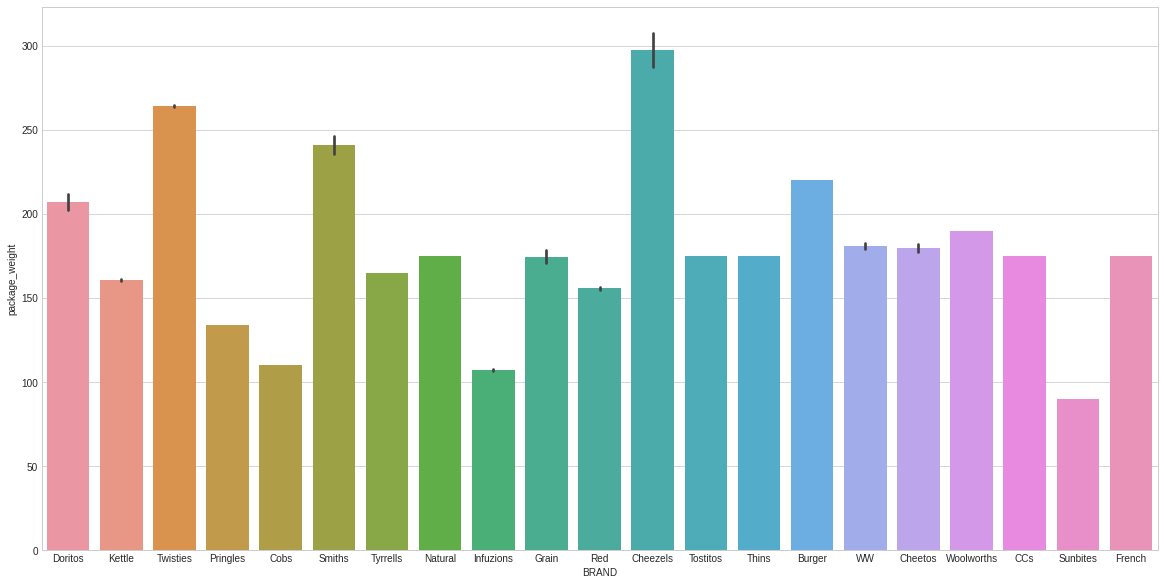

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='BRAND', y= 'package_weight', data= mainstream)

Most preferred Brand are the likes of Cheezles with highest package_weight followed by Twisties.

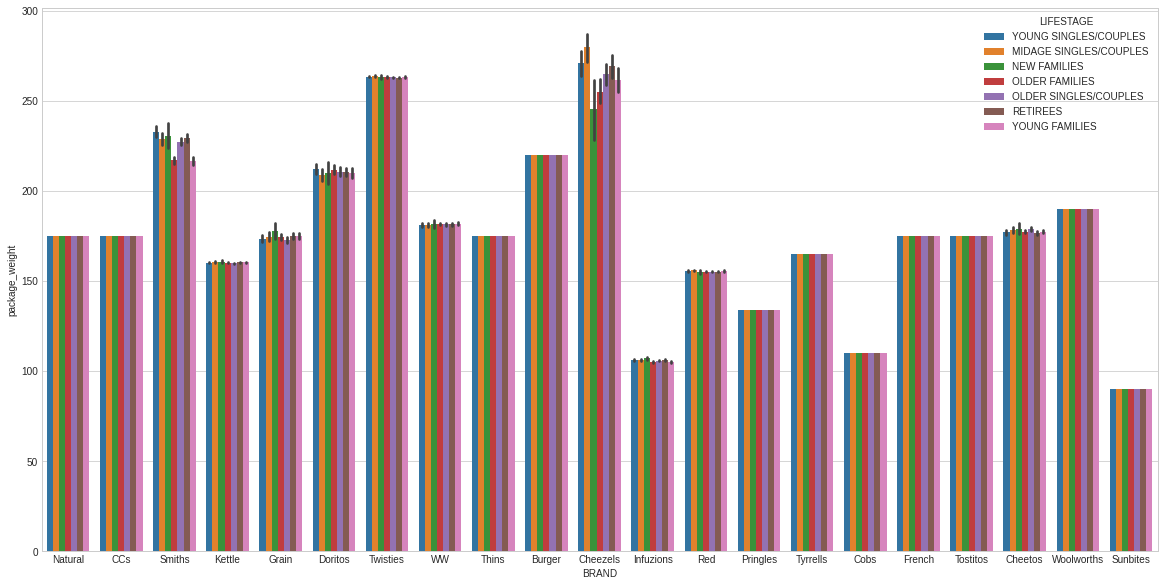

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='BRAND', y= 'package_weight',hue= 'LIFESTAGE', data= z)

Young and Midage Singles/Couples prefer bigger package size in general. 

# **Conclusion**: 
**Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. We’ve also found that Mainstream young singles and couples are 22.5% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.**
